### Name - Faiza Ahmad and Swapnil Ranjan 

## Business Objectives:

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).

In [266]:
# Importing necessary packages to perform the analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [267]:
# By default pandas allows only 30 columns/rows to diplay, we are using set_option to change the default number of rows.

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [268]:
# To ignore warnings

warnings.filterwarnings("ignore")

In [269]:
# Importing application data into a dataframe

application_data = pd.read_csv('application_data.csv')

In [270]:
# Checking variables and structures of the imported dataframe

application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

1. Analyzing columns and their data types using info()
2. Describing numerical attributes
3. Analyzing shape, structure.
4. Identify population health of the application data

In [271]:
# Checking shape of the imported dataframe

application_data.shape

(307511, 122)

In [272]:
# Checking datatype of the columns imported

application_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [273]:
# Checking Mean, Median, Mode of the dataframe and transposing the result to get clear picture

application_data.describe().T

count           mean            std  \
SK_ID_CURR                    307511.0  278180.518577  102790.175348   
TARGET                        307511.0       0.080729       0.272419   
CNT_CHILDREN                  307511.0       0.417052       0.722121   
AMT_INCOME_TOTAL              307511.0  168797.919297  237123.146279   
AMT_CREDIT                    307511.0  599025.999706  402490.776996   
AMT_ANNUITY                   307499.0   27108.573909   14493.737315   
AMT_GOODS_PRICE               307233.0  538396.207429  369446.460540   
REGION_POPULATION_RELATIVE    307511.0       0.020868       0.013831   
DAYS_BIRTH                    307511.0  -16036.995067    4363.988632   
DAYS_EMPLOYED                 307511.0   63815.045904  141275.766519   
DAYS_REGISTRATION             307511.0   -4986.120328    3522.886321   
DAYS_ID_PUBLISH               307511.0   -2994.202373    1509.450419   
OWN_CAR_AGE                   104582.0      12.061091      11.944812   
FLAG_MOBIL                    307511.0       0.999997       0.001803   
FLAG_EMP_PHONE                307511.0       0.819889       0.384280   
FLAG_WORK_PHONE               307511.0       0.199368       0.399526   
FLAG_CONT_MOBILE              307511.0       0.998133       0.043164   
FLAG_PHONE                    307511.0       0.281066       0.449521   
FLAG_EMAIL                    307511.0       0.056720       0.231307   
CNT_FAM_MEMBERS               307509.0       2.152665       0.910682   
REGION_RATING_CLIENT          307511.0       2.052463       0.509034   
REGION_RATING_CLIENT_W_CITY   307511.0       2.031521       0.502737   
HOUR_APPR_PROCESS_START       307511.0      12.063419       3.265832   
REG_REGION_NOT_LIVE_REGION    307511.0       0.015144       0.122126   
REG_REGION_NOT_WORK_REGION    307511.0       0.050769       0.219526   
LIVE_REGION_NOT_WORK_REGION   307511.0       0.040659       0.197499   
REG_CITY_NOT_LIVE_CITY        307511.0       0.078173       0.268444   
REG_CITY_NOT_WORK_CITY        307511.0       0.230454       0.421124   
LIVE_CITY_NOT_WORK_CITY       307511.0       0.179555       0.383817   
EXT_SOURCE_1                  134133.0       0.502130       0.211062   
EXT_SOURCE_2                  306851.0       0.514393       0.191060   
EXT_SOURCE_3                  246546.0       0.510853       0.194844   
APARTMENTS_AVG                151450.0       0.117440       0.108240   
BASEMENTAREA_AVG              127568.0       0.088442       0.082438   
YEARS_BEGINEXPLUATATION_AVG   157504.0       0.977735       0.059223   
YEARS_BUILD_AVG               103023.0       0.752471       0.113280   
COMMONAREA_AVG                 92646.0       0.044621       0.076036   
ELEVATORS_AVG                 143620.0       0.078942       0.134576   
ENTRANCES_AVG                 152683.0       0.149725       0.100049   
FLOORSMAX_AVG                 154491.0       0.226282       0.144641   
FLOORSMIN_AVG                  98869.0       0.231894       0.161380   
LANDAREA_AVG                  124921.0       0.066333       0.081184   
LIVINGAPARTMENTS_AVG           97312.0       0.100775       0.092576   
LIVINGAREA_AVG                153161.0       0.107399       0.110565   
NONLIVINGAPARTMENTS_AVG        93997.0       0.008809       0.047732   
NONLIVINGAREA_AVG             137829.0       0.028358       0.069523   
APARTMENTS_MODE               151450.0       0.114231       0.107936   
BASEMENTAREA_MODE             127568.0       0.087543       0.084307   
YEARS_BEGINEXPLUATATION_MODE  157504.0       0.977065       0.064575   
YEARS_BUILD_MODE              103023.0       0.759637       0.110111   
COMMONAREA_MODE                92646.0       0.042553       0.074445   
ELEVATORS_MODE                143620.0       0.074490       0.132256   
ENTRANCES_MODE                152683.0       0.145193       0.100977   
FLOORSMAX_MODE                154491.0       0.222315       0.143709   
FLOORSMIN_MODE                 98869.0       0.228058       0.161160   
L

## Analyzing the data: 

Data Quality Check, Missing Values and Outliers

In [274]:
# Finding Percentage of missing values:

missing_percentage = (application_data.isna().sum()*100/application_data.shape[0])
missing_percentage.sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [275]:
# Excluding Columns having more than 50% of the Missing Values and storing it in the new dataframe for further analysis and checking the rows and columsn count

application_data_new = application_data[(missing_percentage[missing_percentage < 50]).index]
application_data_new.shape

(307511, 81)

We can notice that earlier there were 121 columns available in the database and post excluding columns having more than 50% missing values, we now have 81 columns remaining

In [276]:
# Checking the columns having 'Object' Datatype in the dataframe

application_data_new.select_dtypes(include='O').head()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY NAME_TYPE_SUITE  \
0         Cash loans           M            N               Y   Unaccompanied   
1         Cash loans           F            N               N          Family   
2    Revolving loans           M            Y               Y   Unaccompanied   
3         Cash loans           F            N               Y   Unaccompanied   
4         Cash loans           M            N               Y   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0  House / apartment        Laborers                  WEDNESDAY   
1  House / apartment      Core staff                     MONDAY   
2  House / apartment        Laborers                     MONDAY   
3  House / apartment        Laborers                  WEDNESDAY   
4  House / apartment      Core staff                   THURSDAY   

        ORGANIZATION_TYPE EMERGENCYSTATE_MODE  
0  Business Entity Type 3                  No  
1                  School                  No  
2              Government                 NaN  
3  Business Entity Type 3                 NaN  
4                Religion                 NaN

In [277]:
# Checking columns having 'Other than Object' datatype

application_data_new.select_dtypes(exclude='O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 68 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   CNT_CHILDREN                  307511 non-null  int64  
 3   AMT_INCOME_TOTAL              307511 non-null  float64
 4   AMT_CREDIT                    307511 non-null  float64
 5   AMT_ANNUITY                   307499 non-null  float64
 6   AMT_GOODS_PRICE               307233 non-null  float64
 7   REGION_POPULATION_RELATIVE    307511 non-null  float64
 8   DAYS_BIRTH                    307511 non-null  int64  
 9   DAYS_EMPLOYED                 307511 non-null  int64  
 10  DAYS_REGISTRATION             307511 non-null  float64
 11  DAYS_ID_PUBLISH               307511 non-null  int64  
 12  FLAG_MOBIL                    307511 non-nul

In [278]:
application_data_new.select_dtypes(exclude='O').head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0          202500.0    406597.5   
1      100003       0             0          270000.0   1293502.5   
2      100004       0             0           67500.0    135000.0   
3      100006       0             0          135000.0    312682.5   
4      100007       0             0          121500.0    513000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0      24700.5         351000.0                    0.018801       -9461   
1      35698.5        1129500.0                    0.003541      -16765   
2       6750.0         135000.0                    0.010032      -19046   
3      29686.5         297000.0                    0.008019      -19005   
4      21865.5         513000.0                    0.028663      -19932   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0           -637            -3648.0            -2120           1   
1          -1188            -1186.0             -291           1   
2           -225            -4260.0            -2531           1   
3          -3039            -9833.0            -2437           1   
4          -3038            -4311.0            -3458           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              1.0                     2                            2   
1              2.0                     1                            1   
2              1.0                     2                            2   
3              2.0                     2                            2   
4              1.0                     2                            2   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

   EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  \
0      0.262949      0.139376                       0.9722         0.0833   
1      0.622246           NaN                       0.9851         0.2917   
2      0.555912      0.729567                          NaN            NaN   
3      0.650442           NaN                          NaN            NaN   
4      0.322738           NaN                          NaN            NaN   

   YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  YEARS_BEGINEXPLUATATION_MEDI  \
0                        0.9722          0.0833                        0.

We can observe by going through the above table that there are negative values reflecting for below columns which we will have to change to positive:
DAYA_BIRTH
DAYS_EMPLOYED 
DAYS_REGISTRATION 
DAYS_ID_PUBLISH 
DAYS_LAST_PHONE_CHANGE

In [279]:
# Selecting all the columns having numerical values and is having negative values

# Assigning all the days relatef columns having negative value in a new dataframe. Which are 'DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE'

negative_days_columns= ['DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']

for i in negative_days_columns:
    application_data_new[i]= application_data_new[i].apply(lambda x: abs(x))

# Checking the values post conversion
application_data_new[negative_days_columns].head()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0        9461            637             3648.0             2120   
1       16765           1188             1186.0              291   
2       19046            225             4260.0             2531   
3       19005           3039             9833.0             2437   
4       19932           3038             4311.0             3458   

   DAYS_LAST_PHONE_CHANGE  
0                  1134.0  
1                   828.0  
2                   815.0  
3                   617.0  
4                  1106.0

In [280]:
# Checking columns having 'Float' Datatype

application_data_new.select_dtypes(include='float64').head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0          202500.0    406597.5      24700.5         351000.0   
1          270000.0   1293502.5      35698.5        1129500.0   
2           67500.0    135000.0       6750.0         135000.0   
3          135000.0    312682.5      29686.5         297000.0   
4          121500.0    513000.0      21865.5         513000.0   

   REGION_POPULATION_RELATIVE  DAYS_REGISTRATION  CNT_FAM_MEMBERS  \
0                    0.018801             3648.0              1.0   
1                    0.003541             1186.0              2.0   
2                    0.010032             4260.0              1.0   
3                    0.008019             9833.0              2.0   
4                    0.028663             4311.0              1.0   

   EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  \
0      0.262949      0.139376                       0.9722         0.0833   
1      0.622246           NaN                       0.9851         0.2917   
2      0.555912      0.729567                          NaN            NaN   
3      0.650442           NaN                          NaN            NaN   
4      0.322738           NaN                          NaN            NaN   

   YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  YEARS_BEGINEXPLUATATION_MEDI  \
0                        0.9722          0.0833                        0.9722   
1                        0.9851          0.2917                        0.9851   
2                           NaN             NaN                           NaN   
3                           NaN             NaN                           NaN   
4                           NaN             NaN                           NaN   

   FLOORSMAX_MEDI  TOTALAREA_MODE  OBS_30_CNT_SOCIAL_CIRCLE  \
0          0.0833          0.0149                       2.0   
1          0.2917          0.0714                       1.0   
2             NaN             NaN                       0.0   
3             NaN             NaN                       2.0   
4             NaN             NaN                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       0.0                       1.0   
2                       0.0                       0.0   
3                       0.0                       2.0   
4                       0.0                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                  1134.0   
1                       0.0                   828.0   
2                       0.0                   815.0   
3                       0.0                   617.0   
4                       0.0                  1106.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0

Columns in the above table denotes Number of enquires, count of family members, No. of social media connects and No. of days. So these columns can not be in float, so we will convert these float datatype into integer datatype

In [281]:
# Converting float into Integer datatype for the above mentioned columns

column_integer = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
          'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','CNT_FAM_MEMBERS', 'OBS_30_CNT_SOCIAL_CIRCLE',
          'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_REGISTRATION',
          'DAYS_LAST_PHONE_CHANGE']

for col in column_integer:
    application_data_new[col]= application_data_new[col].astype('Int64', errors='ignore')

# Checking the datatype post conversion
application_data_new[column_integer].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AMT_REQ_CREDIT_BUREAU_HOUR  265992 non-null  Int64  
 1   AMT_REQ_CREDIT_BUREAU_DAY   265992 non-null  Int64  
 2   AMT_REQ_CREDIT_BUREAU_WEEK  265992 non-null  Int64  
 3   AMT_REQ_CREDIT_BUREAU_MON   265992 non-null  Int64  
 4   AMT_REQ_CREDIT_BUREAU_QRT   265992 non-null  Int64  
 5   AMT_REQ_CREDIT_BUREAU_YEAR  265992 non-null  Int64  
 6   CNT_FAM_MEMBERS             307509 non-null  Int64  
 7   OBS_30_CNT_SOCIAL_CIRCLE    306490 non-null  Int64  
 8   DEF_30_CNT_SOCIAL_CIRCLE    306490 non-null  Int64  
 9   OBS_60_CNT_SOCIAL_CIRCLE    306490 non-null  Int64  
 10  DEF_60_CNT_SOCIAL_CIRCLE    306490 non-null  Int64  
 11  DAYS_REGISTRATION           307511 non-null  float64
 12  DAYS_LAST_PHONE_CHANGE      307510 non-null  Int64  
dtypes: Int64(12), 

Checking integer columns having categorical data

In [282]:
# In order to perform EDA, converting these columns into 'Object' datatype is necessary. It will help us in doing unvariate and bivariate analysis.

# We are using nunique which is used to get a count of unique values.

unique_columns= application_data_new.select_dtypes('int64').nunique()
unique_columns

SK_ID_CURR                     307511
TARGET                              2
CNT_CHILDREN                       15
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_ID_PUBLISH                  6168
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
CNT_FAM_MEMBERS                    17
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
HOUR_APPR_PROCESS_START            24
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
OBS_30_CNT_SOCIAL_CIRCLE           33
DEF_30_CNT_SOCIAL_CIRCLE           10
OBS_60_CNT_SOCIAL_CIRCLE           33
DEF_60_CNT_SOCIAL_CIRCLE            9
DAYS_LAST_PH

In [283]:
# Ceating list of the columns that have maximum of 3 unique values

listed_columns = unique_columns[unique_columns<=3].index.tolist()
listed_columns

['TARGET',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [284]:
#Converting these columns from type int64 to object

for z in listed_columns:
    application_data_new[z]= application_data_new[z].astype("object")

# Checking the datatype post conversion   
application_data_new[listed_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   TARGET                       307511 non-null  object
 1   FLAG_MOBIL                   307511 non-null  object
 2   FLAG_EMP_PHONE               307511 non-null  object
 3   FLAG_WORK_PHONE              307511 non-null  object
 4   FLAG_CONT_MOBILE             307511 non-null  object
 5   FLAG_PHONE                   307511 non-null  object
 6   FLAG_EMAIL                   307511 non-null  object
 7   REGION_RATING_CLIENT         307511 non-null  object
 8   REGION_RATING_CLIENT_W_CITY  307511 non-null  object
 9   REG_REGION_NOT_LIVE_REGION   307511 non-null  object
 10  REG_REGION_NOT_WORK_REGION   307511 non-null  object
 11  LIVE_REGION_NOT_WORK_REGION  307511 non-null  object
 12  REG_CITY_NOT_LIVE_CITY       307511 non-null  object
 13  REG_CITY_NOT_W

Analyzing columns having less than 15% missing values

In [285]:
# Columns having Missing Values more than 0% but less than 15%

application_data_new[(missing_percentage[(missing_percentage < 15) & (missing_percentage > 0)]).index].isnull().sum()

AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
CNT_FAM_MEMBERS                   2
EXT_SOURCE_2                    660
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
DAYS_LAST_PHONE_CHANGE            1
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64

In [286]:
application_data_new[(missing_percentage[(missing_percentage <= 14) & (missing_percentage > 0)]).index]

AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  CNT_FAM_MEMBERS  \
0           24700.5         351000.0   Unaccompanied                1   
1           35698.5        1129500.0          Family                2   
2            6750.0         135000.0   Unaccompanied                1   
3           29686.5         297000.0   Unaccompanied                2   
4           21865.5         513000.0   Unaccompanied                1   
...             ...              ...             ...              ...   
307506      27558.0         225000.0   Unaccompanied                1   
307507      12001.5         225000.0   Unaccompanied                1   
307508      29979.0         585000.0   Unaccompanied                1   
307509      20205.0         319500.0   Unaccompanied                2   
307510      49117.5         675000.0   Unaccompanied                2   

        EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0           0.262949                         2                         2   
1           0.622246                         1                         0   
2           0.555912                         0                         0   
3           0.650442                         2                         0   
4           0.322738                         0                         0   
...              ...                       ...                       ...   
307506      0.681632                         0                         0   
307507      0.115992                         0                         0   
307508      0.535722                         6                         0   
307509      0.514163                         0                         0   
307510      0.708569                         0                         0   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                              2                         2   
1                              1                         0   
2                              0                         0   
3                              2                         0   
4                              0                         0   
...                          ...                       ...   
307506                         0                         0   
307507                         0                         0   
307508                         6                         0   
307509                         0                         0   
307510                         0                         0   

        DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                         1134                           0   
1                          828                           0   
2                          815                           0   
3                          617                        <NA>   
4                         1106                           0   
...                        ...                         ...   
307506                     273                        <NA>   
307507                       0                        <NA>   
307508                    1909                           1   
307509                     322                           0   
307510                     787                           0   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                               0                           0   
1                               0                           0   
2                               0                           0   
3                            <NA>                        <NA>   
4                               0                           0   
...                           ...                         ...   
307506                       <NA>                        <NA>   
307507                       <NA>                        <NA>   
307508                          0                           0   
307509                          0                           0   
307510       

Missing Value Treatment which we can perform: 

1. NAME_TYPE_SUITE: Since it’s a categorical column, we can use mode to impute the missing values.
2. AMT_ANNUITY: Continuous value. We can use median imputation to treat missing value since the distribution is not symmetrical.
3. AMT_GOODS_PRICE: We can use median imputation to treat missing values.
4. EXT_SOURCE: We can replace missing values using median imputation.
5. CNT_SOCIAL_CIRCLE: Mode imputation can be used for these columns.
6. DAYS_LAST_PHONE_CHANGE: Median imputation can be used since single value is missing.



## Checking outliers for numeric values

In [287]:
# Fetching the columns for which we will be checking outliers

application_data_new.select_dtypes(exclude='object')

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0           100002             0          202500.0    406597.5      24700.5   
1           100003             0          270000.0   1293502.5      35698.5   
2           100004             0           67500.0    135000.0       6750.0   
3           100006             0          135000.0    312682.5      29686.5   
4           100007             0          121500.0    513000.0      21865.5   
...            ...           ...               ...         ...          ...   
307506      456251             0          157500.0    254700.0      27558.0   
307507      456252             0           72000.0    269550.0      12001.5   
307508      456253             0          153000.0    677664.0      29979.0   
307509      456254             0          171000.0    370107.0      20205.0   
307510      456255             0          157500.0    675000.0      49117.5   

        AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0              351000.0                    0.018801        9461   
1             1129500.0                    0.003541       16765   
2              135000.0                    0.010032       19046   
3              297000.0                    0.008019       19005   
4              513000.0                    0.028663       19932   
...                 ...                         ...         ...   
307506         225000.0                    0.032561        9327   
307507         225000.0                    0.025164       20775   
307508         585000.0                    0.005002       14966   
307509         319500.0                    0.005313       11961   
307510         675000.0                    0.046220       16856   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
0                 637             3648.0             2120                1   
1                1188             1186.0              291                2   
2                 225             4260.0             2531                1   
3                3039             9833.0             2437                2   
4                3038             4311.0             3458                1   
...               ...                ...              ...              ...   
307506            236             8456.0             1982                1   
307507         365243             4388.0             4090                1   
307508           7921             6737.0             5150                1   
307509           4786             2562.0              931                2   
307510           1262             5128.0              410                2   

        HOUR_APPR_PROCESS_START  EXT_SOURCE_2  EXT_SOURCE_3  \
0                            10      0.262949      0.139376   
1                            11      0.622246           NaN   
2                             9      0.555912      0.729567   
3                            17      0.650442           NaN   
4                            11      0.322738           NaN   
...                         ...           ...           ...   
307506                       15      0.681632           NaN   
307507                        8      0.115992           NaN   
307508                        9      0.535722      0.218859   
307509                        9      0.514163      0.661024   
307510                       20      0.708569      0.113922   

        YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  \
0                            0.9722         0.0833   
1                            0.9851         0.2917   
2                               NaN            NaN   
3                               NaN            NaN   
4                               NaN            NaN   
...                             ...            ...   
307506                       0.9876         0.6042   
307507                       0.9727         0.0833   
307508                       0.9816         0.1667   
307509              

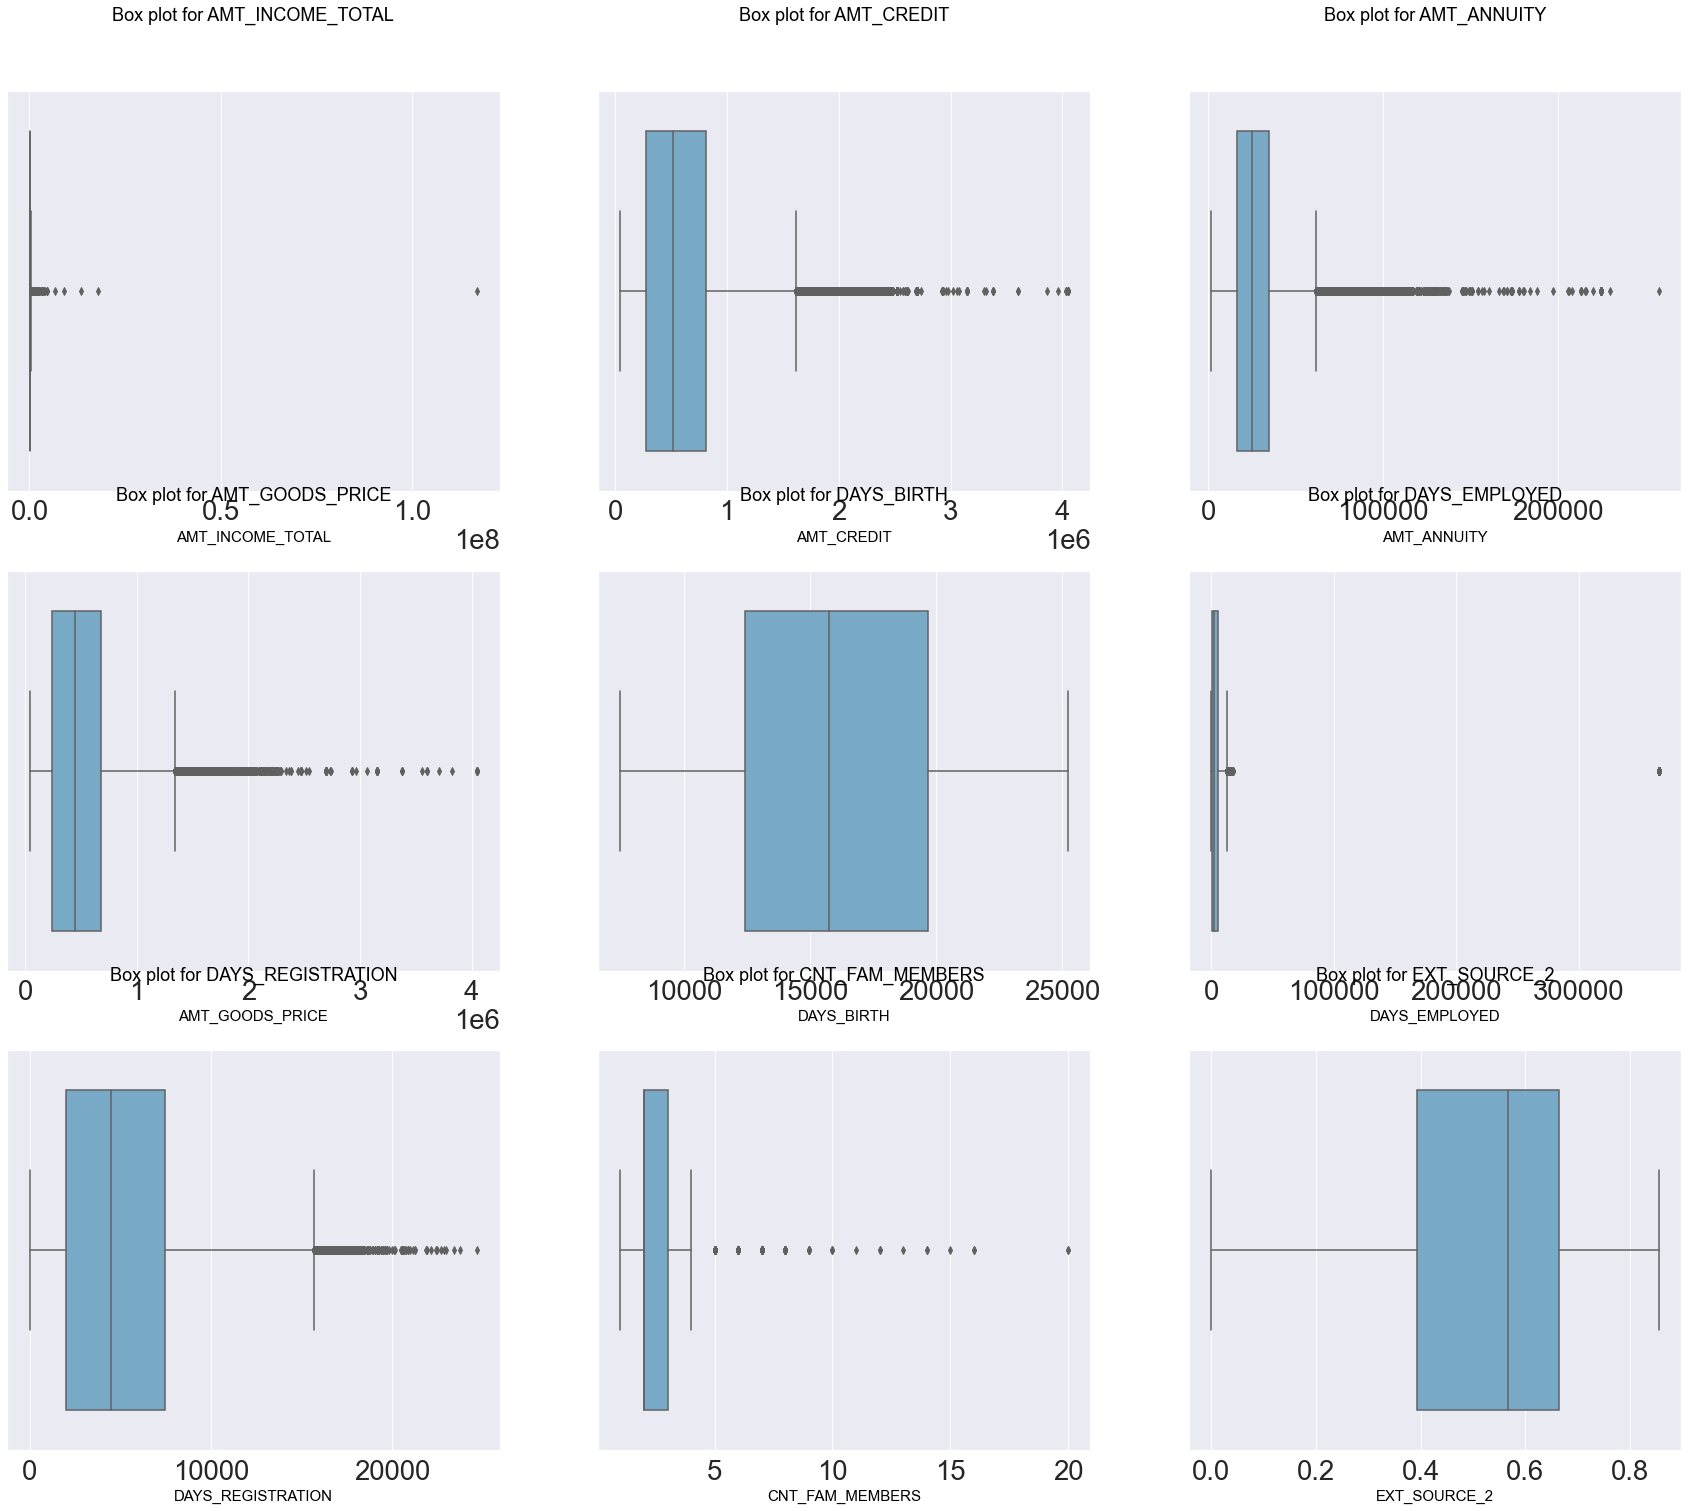

In [288]:
outlier_columns= ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 
                'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2']

#box plot of selected numeric columns

sns.set(font_scale = 2.5)
plt.figure(figsize=[30,25])

for z, col in enumerate(outlier_columns, 1):
    plt.subplot(3,3,z)
    title_text= f'Box plot for {col}'
    x_label= f'{col}'
    fig = sns.boxplot(data= application_data_new, x= col, palette= 'Blues')
    fig.set_title(title_text, fontdict= { 'fontsize': 18, 'color': 'Black'})
    fig.set_xlabel(x_label, fontdict= {'fontsize': 15, 'color': 'Black'})

Few Outlier Observations:

1. AMT_INCOME_TOTAL we have outliers (approx 120M)
2. AMT_CREDIT few amount of the loan are above 3M.
3. DAYS_MONTH - there is no outliers.
4. DAYS_EMPLOYED - Outlier having value more than 300000 days
5. EXT_SOURCE_2 - No outliers
6. DAYS_REGISTRATION: We can see values between 24k and 25k which is an outlier
7. CNT_FAM_MEMBERS: We can see outliers at value 20, also there are very few observations above 15.
8. DAYS_BIRTH - there is no outliers.
9. AMT_GOODS_PRICE: There is an outlier above 4M.
10. AMT_ANNUITY: We can see values greater than 250K, which can be treated as an outlier.

In [289]:
# As we see in the above observation, DAYS_EMPLOYED is having outlier value more than 300000 days which doesnot make sense. Hence investigating further

application_data_new.loc[application_data_new.DAYS_EMPLOYED > 300000, 'DAYS_EMPLOYED']

8         365243
11        365243
23        365243
38        365243
43        365243
           ...  
307469    365243
307483    365243
307487    365243
307505    365243
307507    365243
Name: DAYS_EMPLOYED, Length: 55374, dtype: int64

In [290]:
# Next value after 365243

application_data_new.loc[application_data_new.DAYS_EMPLOYED < 365243, 'DAYS_EMPLOYED'].max()

17912

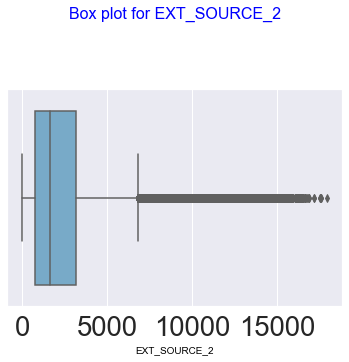

In [336]:
# There are 55374 rows having DAYS_EMPLOYED equals to 365243 Days which must be a garbage value. Hence filtering out the dayta having more than that value and re-plotting the grapgh again to see outliers.

sns.set(font_scale = 2.5)
figure= sns.boxplot(application_data_new[application_data_new.DAYS_EMPLOYED < 365243].DAYS_EMPLOYED, palette= 'Blues')
figure.set_title(title_text, fontdict= { 'fontsize': 16, 'color': 'Blue'})
figure.set_xlabel(x_label, fontdict= {'fontsize': 10, 'color': 'Black'})
plt.show()

## Bucketing the variables

Data bucketing is a technique used in data processing and statistics. In this method, the data is first sorted and then the sorted values are distributed into a number of buckets or bins

In [292]:
# Starting with Continuous Variables

# bucketing based on AMT_INCOME_TOTAL and assigning them into different labels such as low, medium, high and so on.

application_data_new['INCOME_SLAB_BUCKET'] = pd.qcut(application_data_new['AMT_INCOME_TOTAL'], q= [0, 0.05, 0.25, 0.5, 0.75, 0.95, 1], 
                                labels= ['Very Low', 'Low', 'Lower-Medium', 'Higher-Medium', 'High', 'Very High'])

application_data_new['INCOME_SLAB_BUCKET'].head()

0    Higher-Medium
1             High
2         Very Low
3     Lower-Medium
4     Lower-Medium
Name: INCOME_SLAB_BUCKET, dtype: category
Categories (6, object): ['Very Low' < 'Low' < 'Lower-Medium' < 'Higher-Medium' < 'High' < 'Very High']

In [293]:
# Bucketing from DAYS_BIRTH post calulating age

print(np.floor((application_data_new['DAYS_BIRTH'].min())/365))
print(np.floor((application_data_new['DAYS_BIRTH'].max())/365))

20.0
69.0


In [294]:
# Since the lowest and highest age as per the calculion is 20 and 69 respectively, we are taking breaking 20 to 60 as a bucket

application_data_new['AGE_GROUP_BUCKET']= pd.cut(np.floor((application_data_new['DAYS_BIRTH']/365)), [20, 30, 40, 50, 60, 70], 
                                labels= ['Age 20 to 30', 'Age 31 to 40', 'Age 41 to 50', 'Age 51 to 60', 'Age above 60'])

application_data_new['AGE_GROUP_BUCKET'].head()

0    Age 20 to 30
1    Age 41 to 50
2    Age 51 to 60
3    Age 51 to 60
4    Age 51 to 60
Name: AGE_GROUP_BUCKET, dtype: category
Categories (5, object): ['Age 20 to 30' < 'Age 31 to 40' < 'Age 41 to 50' < 'Age 51 to 60' < 'Age above 60']

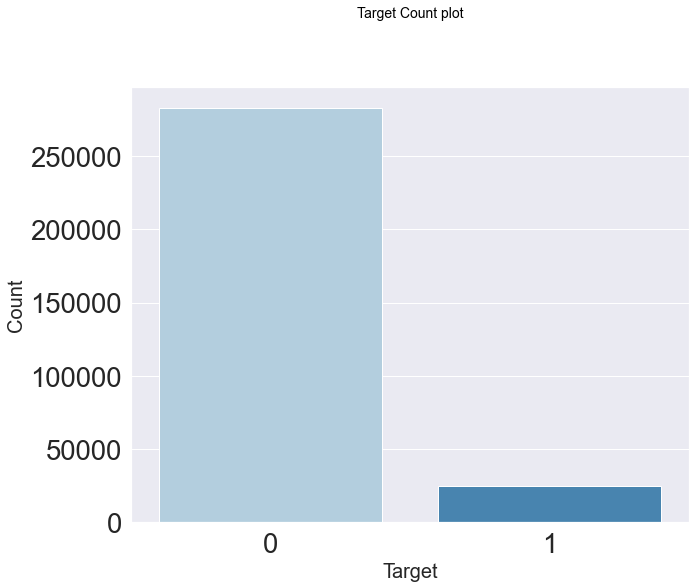

In [339]:
# Analyzing application dataset

# Checking Target variable : The target variable of a dataset is the feature of a dataset about which you want to gain a deeper understanding

sns.set_style()
plt.figure(figsize=[10,8])
sns.countplot(application_data_new.TARGET, palette= 'Blues')
plt.title('Target Count plot', fontdict= {'fontsize': 14, 'color': 'BLack'})
plt.xlabel('Target', fontsize= 20)
plt.ylabel('Count', fontsize= 20)
plt.show()

In [296]:
# Checking for imbalance in target

application_data_new.TARGET.value_counts(normalize= True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

We can see in the above table that almost 91.9% data is of Target 0 and only 8.1% data is of Target 1

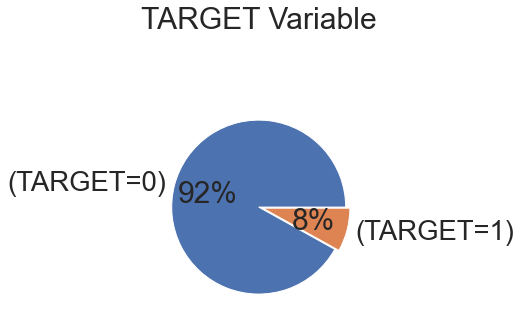

In [297]:
# Plotting it in pie chart for better visibility and understanding where blue color is representing Target = 0 and Orange is representing Target = 1

plt.pie(application_data_new['TARGET'].value_counts(normalize=True)*100,labels=['(TARGET=0)','(TARGET=1)'],explode=(0,0.05),autopct='%1.f%%')
plt.title('TARGET Variable')
plt.show()

## Dividing data into two different dataset - Since we have two different Targets

In [298]:
# First dataset

application_data_new_first= application_data_new[application_data_new.TARGET==0]
application_data_new_first.shape

(282686, 83)

Shape of application_data_new_first: (282686, 83)

In [299]:
# Second dataset

application_data_new_second = application_data_new[application_data_new.TARGET==1]
application_data_new_second.shape

(24825, 83)

Shape of application_data_new_second: (24825, 83)

## Finding Corelation of Numerical Variables

In [340]:
#Finding Cooraltion of numeric columns for target=0 and getting top 10 of selected columns

data1 = application_data_new_first.corr()
corr_data1= data1.where(np.triu(np.ones(data1.shape), k=1).astype(np.bool))
corr_data1= corr_data1.unstack().dropna()
corr_data1= pd.DataFrame(corr_data1).reset_index()
corr_data1.columns= ['Var 1','Var 2','correlation']
corr_data1['abs_correlation']= np.abs(corr_data1['correlation'])
corr_data1.sort_values('abs_correlation', ascending= False).head(10)

Var 1                         Var 2  correlation  \
298      OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE     0.998508   
206                FLOORSMAX_MEDI                 FLOORSMAX_AVG     0.997018   
186  YEARS_BEGINEXPLUATATION_MEDI   YEARS_BEGINEXPLUATATION_AVG     0.993582   
208                FLOORSMAX_MEDI                FLOORSMAX_MODE     0.988153   
13                AMT_GOODS_PRICE                    AMT_CREDIT     0.987250   
169                FLOORSMAX_MODE                 FLOORSMAX_AVG     0.985603   
151  YEARS_BEGINEXPLUATATION_MODE   YEARS_BEGINEXPLUATATION_AVG     0.971032   
188  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE     0.962064   
56                CNT_FAM_MEMBERS                  CNT_CHILDREN     0.878571   
323      DEF_60_CNT_SOCIAL_CIRCLE      DEF_30_CNT_SOCIAL_CIRCLE     0.859332   

     abs_correlation  
298         0.998508  
206         0.997018  
186         0.993582  
208         0.988153  
13          0.987250  
169         0.985603  
151         0.971032  
188         0.962064  
56          0.878571  
323         0.859332

In [302]:
#Finding Cooraltion of numeric columns for Target=1 and getting top 10 of selected columns

data2 = application_data_new_second.corr()
corr_data2= data2.where(np.triu(np.ones(data2.shape), k=1).astype(np.bool))
corr_data2= corr_data2.unstack().dropna()
corr_data2= pd.DataFrame(corr_data2).reset_index()
corr_data2.columns= ['Var 1','Var 2','correlation']
corr_data2['abs_correlation']= np.abs(corr_data2['correlation'])
corr_data2.sort_values('abs_correlation', ascending= False).head(10)

Var 1                         Var 2  correlation  \
298      OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE     0.998269   
206                FLOORSMAX_MEDI                 FLOORSMAX_AVG     0.997187   
186  YEARS_BEGINEXPLUATATION_MEDI   YEARS_BEGINEXPLUATATION_AVG     0.996124   
208                FLOORSMAX_MEDI                FLOORSMAX_MODE     0.989195   
169                FLOORSMAX_MODE                 FLOORSMAX_AVG     0.986594   
13                AMT_GOODS_PRICE                    AMT_CREDIT     0.983103   
151  YEARS_BEGINEXPLUATATION_MODE   YEARS_BEGINEXPLUATATION_AVG     0.980466   
188  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE     0.978073   
56                CNT_FAM_MEMBERS                  CNT_CHILDREN     0.885484   
323      DEF_60_CNT_SOCIAL_CIRCLE      DEF_30_CNT_SOCIAL_CIRCLE     0.868994   

     abs_correlation  
298         0.998269  
206         0.997187  
186         0.996124  
208         0.989195  
169         0.986594  
13          0.983103  
151         0.980466  
188         0.978073  
56          0.885484  
323         0.868994

Observation: In both the cases for Target 0 and Target 1, top 10 variables are same.

## Univariate Analysis :

In Univariate Analysis, we choose a single feature from the data and try to determine what the output or the target value is ,i.e., one feature/variable at a time.

### Univariate Analysis of Categorical Variables

In [350]:
# function to count plot for categorical variables
def univariate(var, fn_sup=14, fn_s=12, figsize=[18,7], xtick_ro= 0):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.countplot(x=var, data=application_data_new_first,ax=ax1)
    ax1.set_ylabel('Total Counts')
    ax1.set_title(f'Distribution of {var} for Target = 0',fontsize=20)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right")
    
    # Adding the normalized percentage for easier comparision between Target 0 and Target 1
    for a in ax1.patches:
        ax1.annotate('{:.1f}%'.format((a.get_height()/len(application_data_new_first))*100), (a.get_x()+0.1, a.get_height()+70))
        
    sns.countplot(x=var, data=application_data_new_second,ax=ax2)
    ax2.set_ylabel('Total Counts')
    ax2.set_title(f'Distribution of {var} for Target = 1',fontsize=20)    
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="right")
    
    # Adding the normalized percentage for easier comparision between Target 0 and Target 1
    for b in ax2.patches:
        ax2.annotate('{:.1f}%'.format((b.get_height()/len(application_data_new_second))*100), (b.get_x()+0.1, b.get_height()+70))
    
    plt.show()

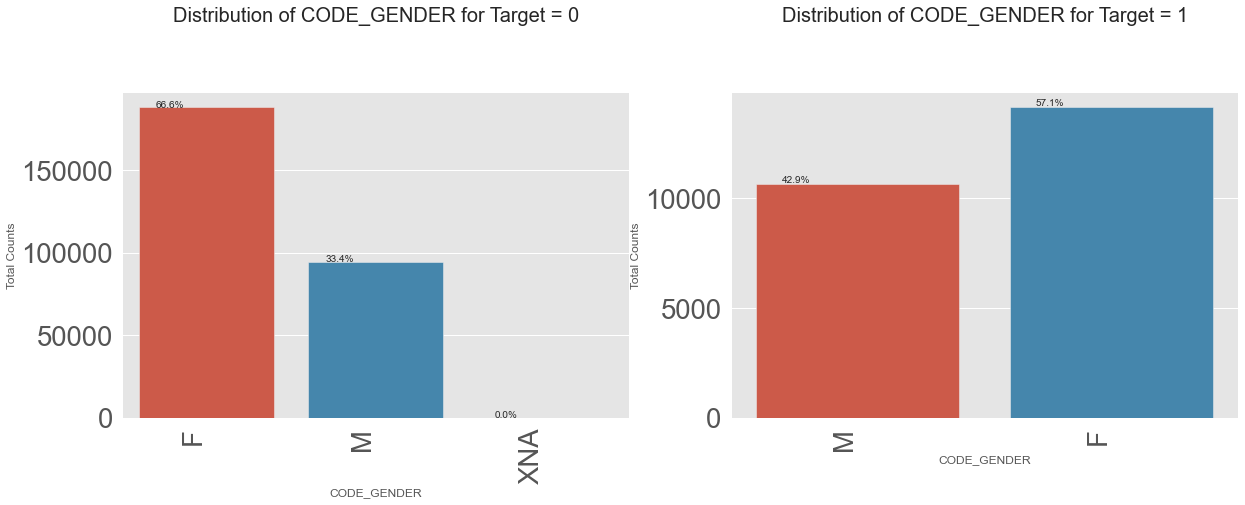

In [351]:
univariate('CODE_GENDER', figsize=[18,5], xtick_ro= 30)

Observation: We can see number of Female clients are much higher than the number of Male clients.

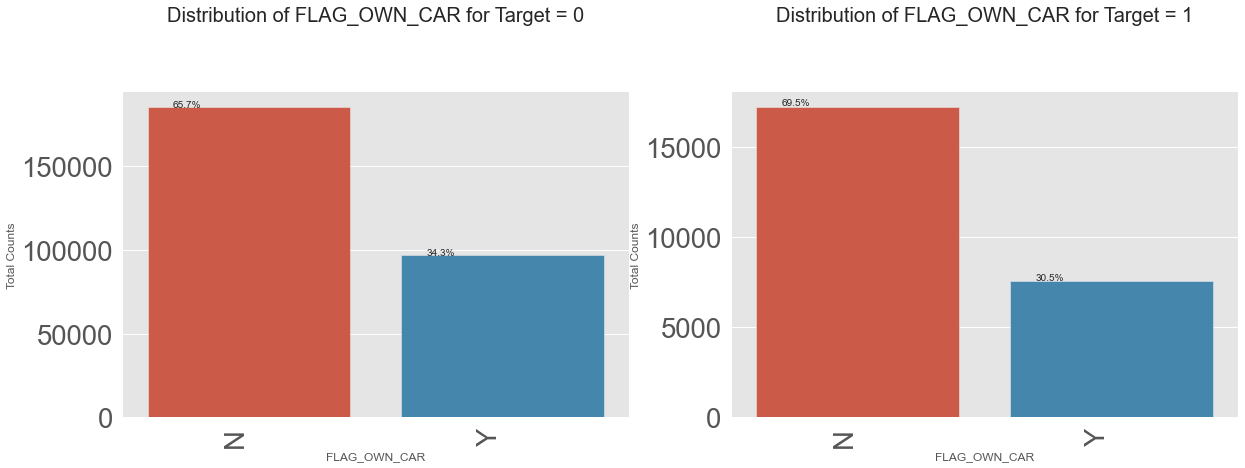

In [352]:
univariate('FLAG_OWN_CAR')

Observation : If we see both the graphs, we can notice that there is not much difference. People having cars are better in repaying the loans

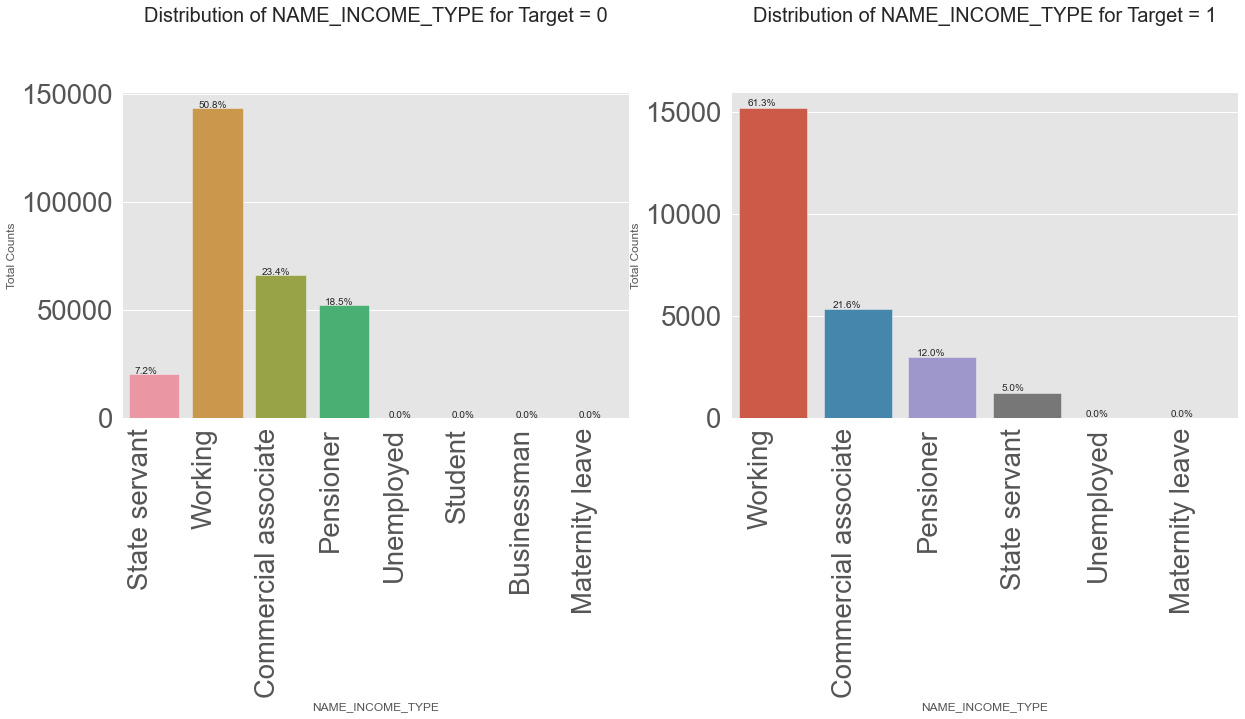

In [353]:
univariate('NAME_INCOME_TYPE')

Observation : Majority of the people who took loans are of working class. Also they have bit higher chance of failing to repay the loan.

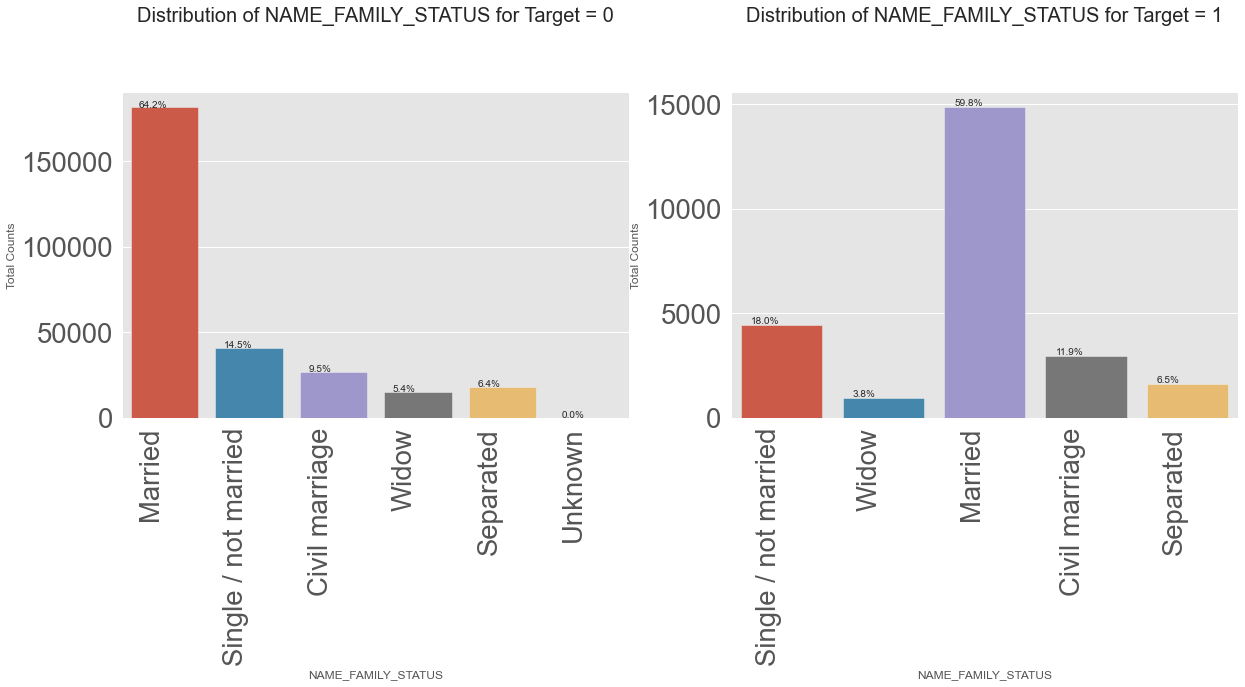

In [354]:
univariate('NAME_FAMILY_STATUS')

Observation: Most of the people are Married and they are less likely to face difficulties in loan repayment.

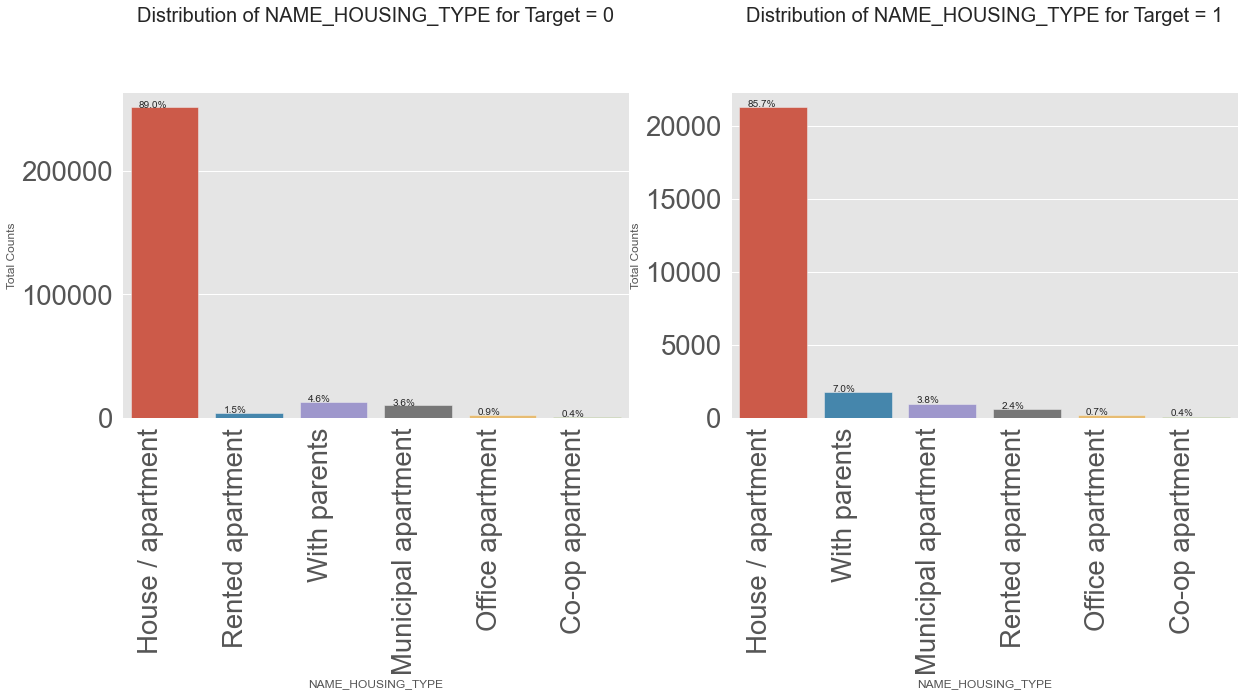

In [355]:
univariate('NAME_HOUSING_TYPE')

Observation: People living with their parents are more likely to face difficulties in loan repayment.

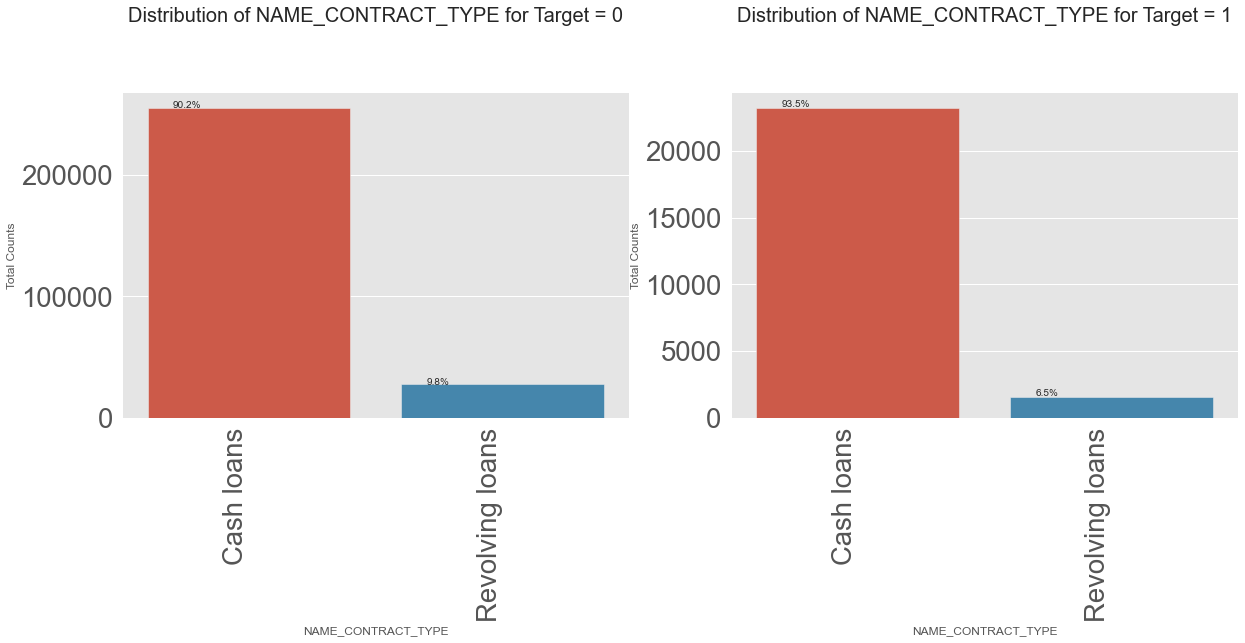

In [356]:
univariate('NAME_CONTRACT_TYPE')

Observation: Number of Cash loan is higher than revolving loan,

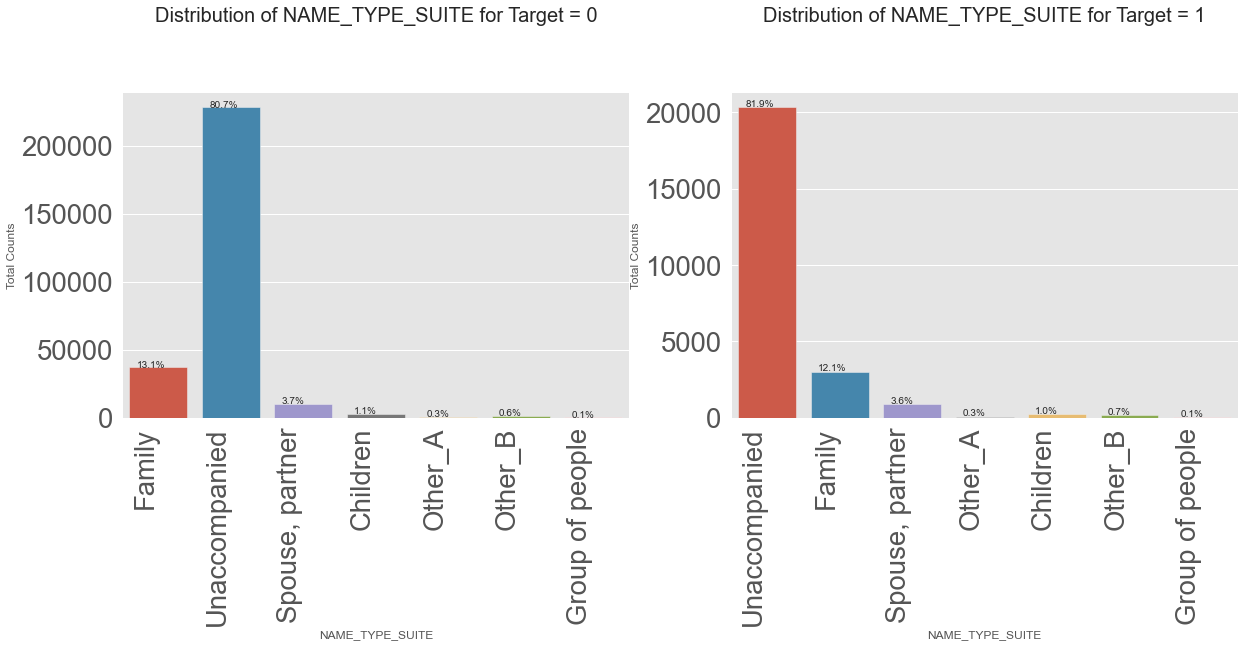

In [357]:
univariate('NAME_TYPE_SUITE')

Observation: The distribution is almost same and most of the people came alone during loan application.

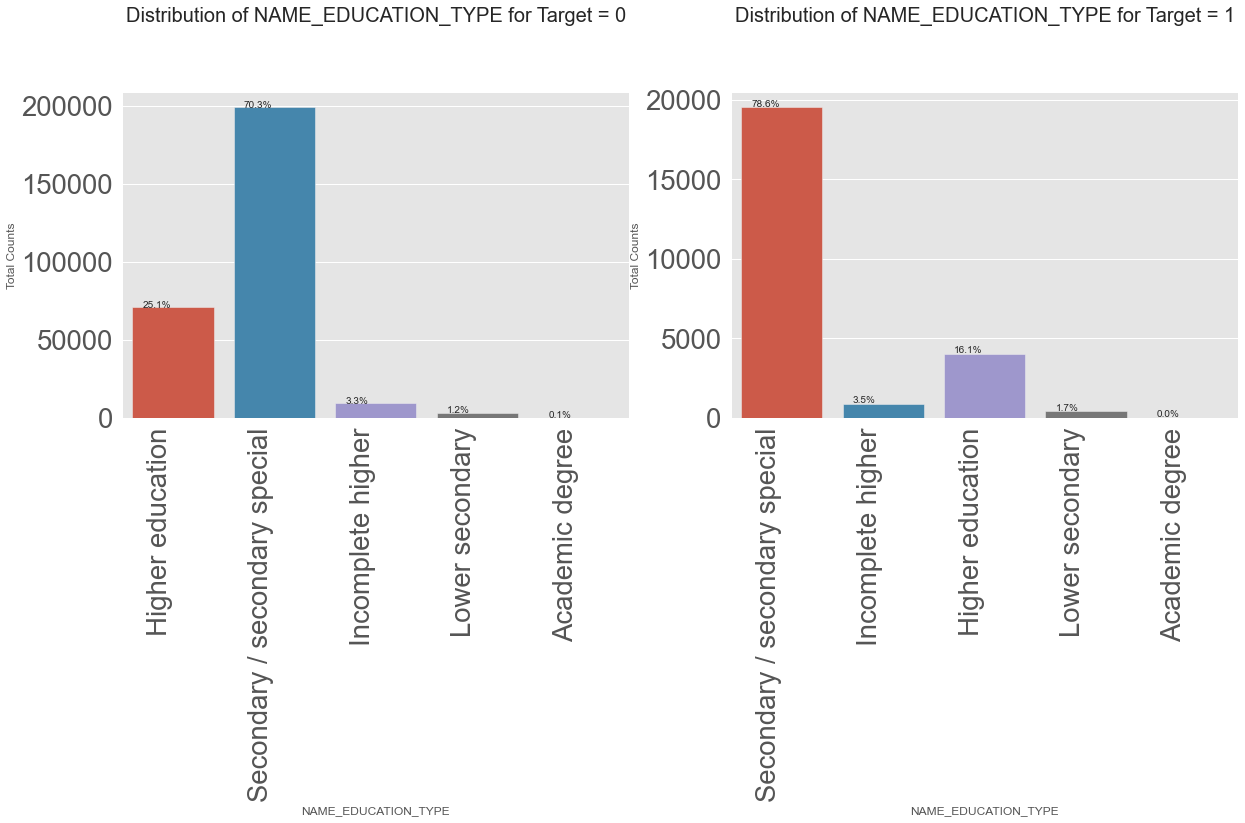

In [358]:
univariate('NAME_EDUCATION_TYPE')

Observation: People having "Higher Education" are more likely to repay the loans better than other education groups. Bank should consider the education as an important parameter before approving the loan.

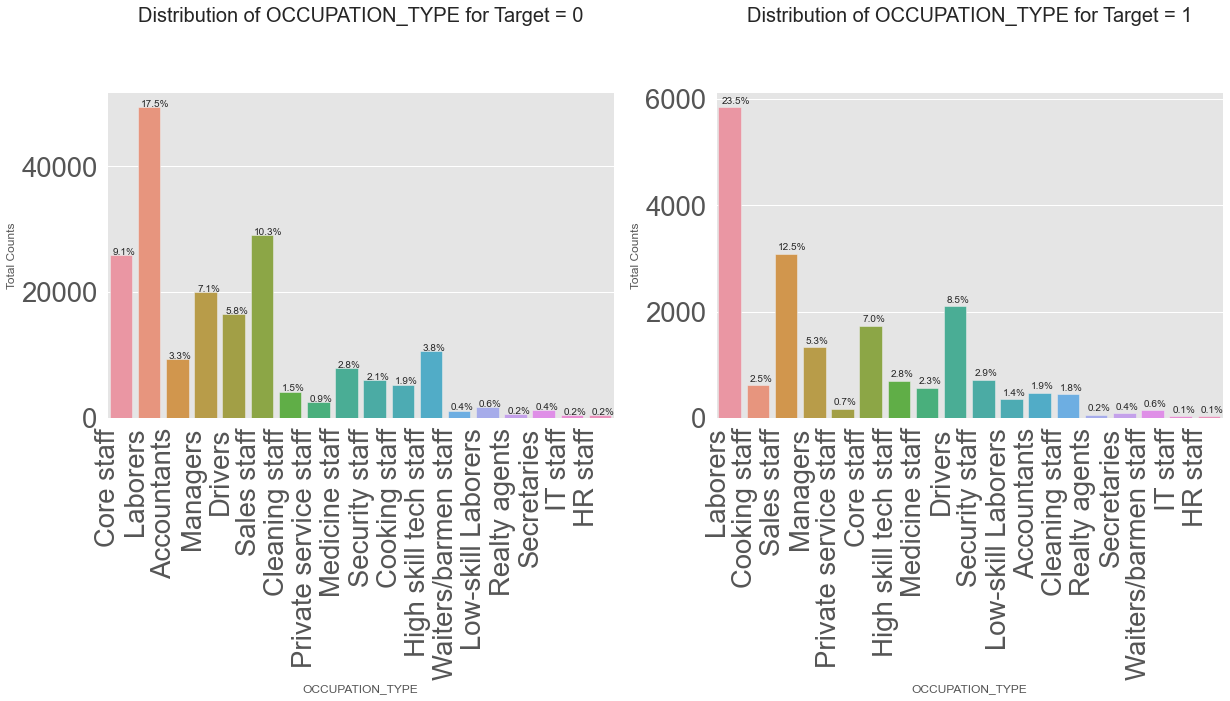

In [359]:
univariate('OCCUPATION_TYPE')

Observation: Most of the people are Laborers and they are facing more difficulties in repaying the loan when compared to other jobs.

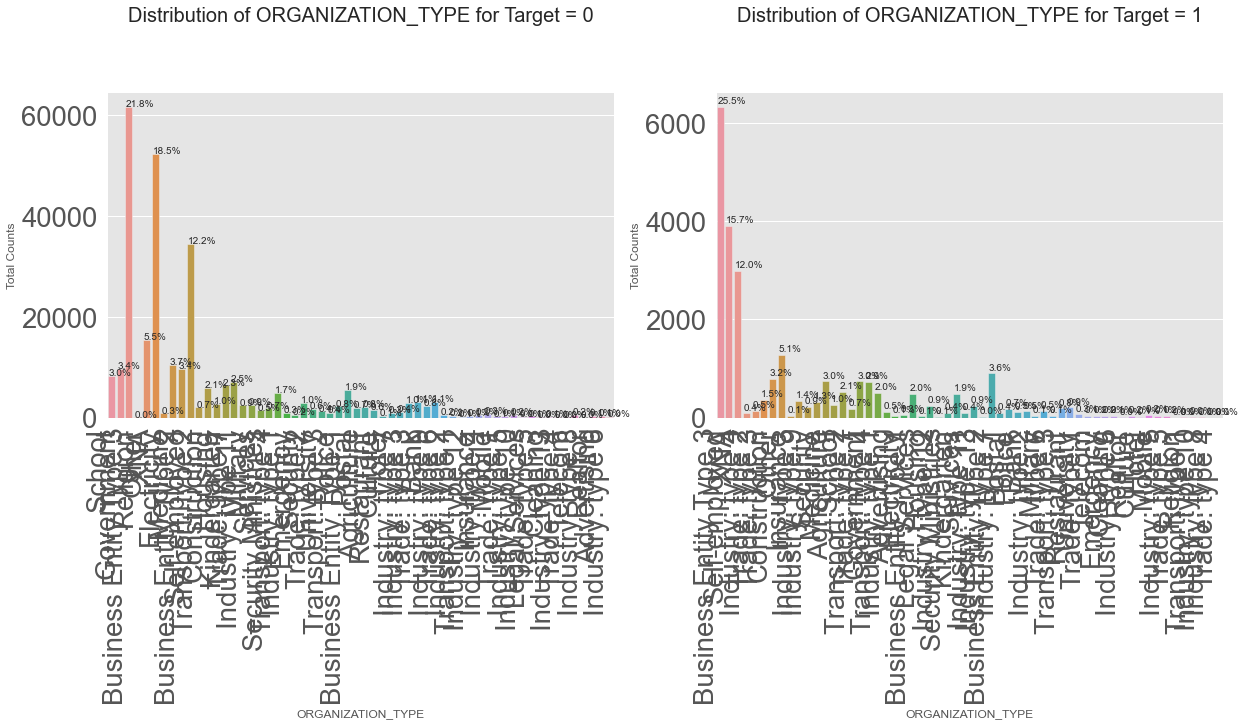

In [360]:
univariate('ORGANIZATION_TYPE', figsize=[20,10], xtick_ro= 90, fn_s= 10)

Observation: Most of the people works in 'Business Entity Type 3'. 

## Univariate analysis of Numerical Values

In [327]:
def num_univariate(var):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    
    sns.distplot(a=application_data_new_first[var],ax=ax1)

    ax1.set_title(f'Distribution of {var} for Target = 0',fontsize=15)
            
    sns.distplot(a=application_data_new_second[var],ax=ax2)
    ax2.set_title(f'Distribution of {var} for Target = 1', fontsize=15)    
        
    plt.show()

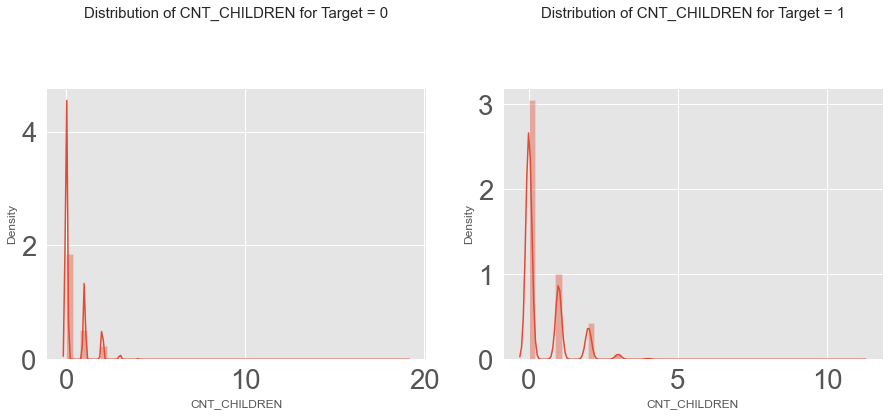

In [328]:
num_univariate('CNT_CHILDREN')

Count of children is higher in Target who are taking loans and also facing difficulty in repayment.

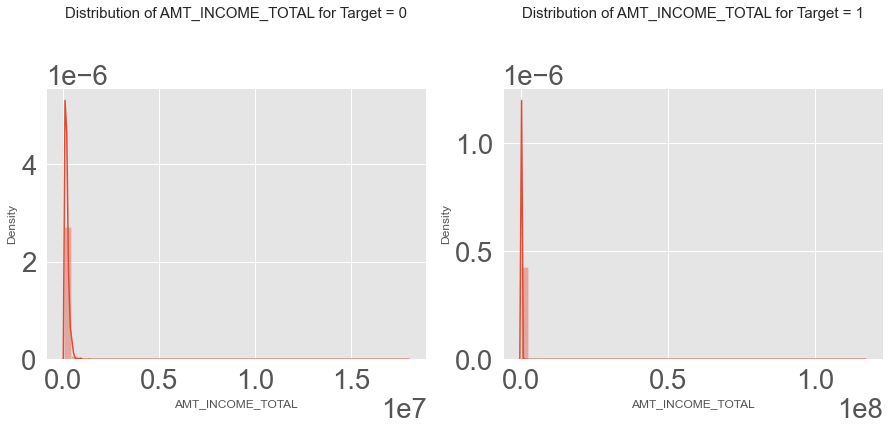

In [329]:
num_univariate('AMT_INCOME_TOTAL')

Annual income for those are very less who is taking loans from the bank and also facing lot of difficulties in returning.

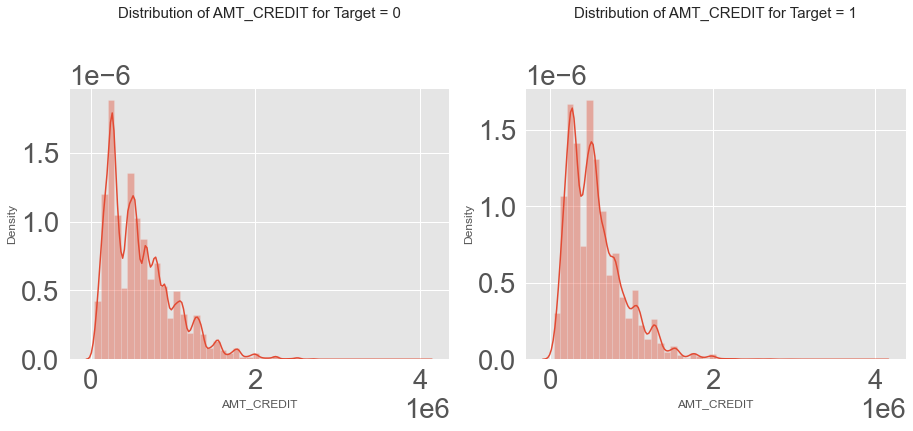

In [330]:
num_univariate('AMT_CREDIT')

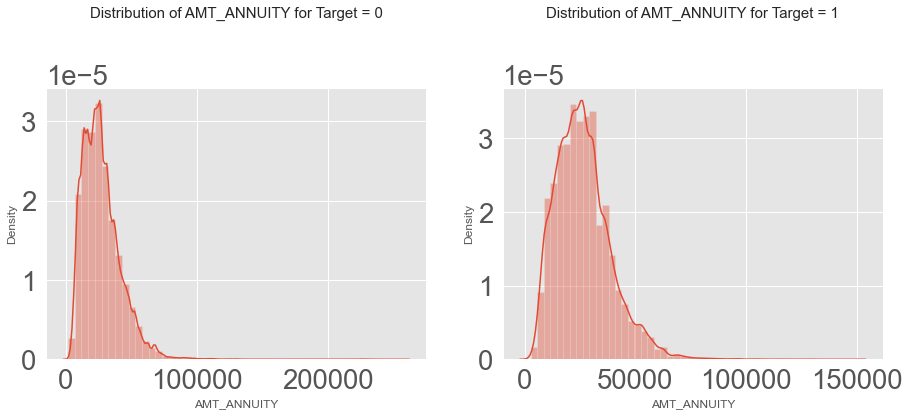

In [331]:
num_univariate('AMT_ANNUITY')

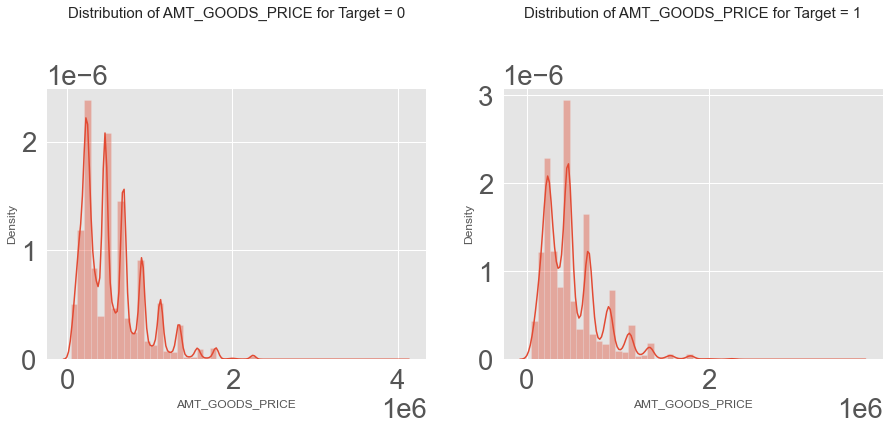

In [332]:
num_univariate('AMT_GOODS_PRICE')

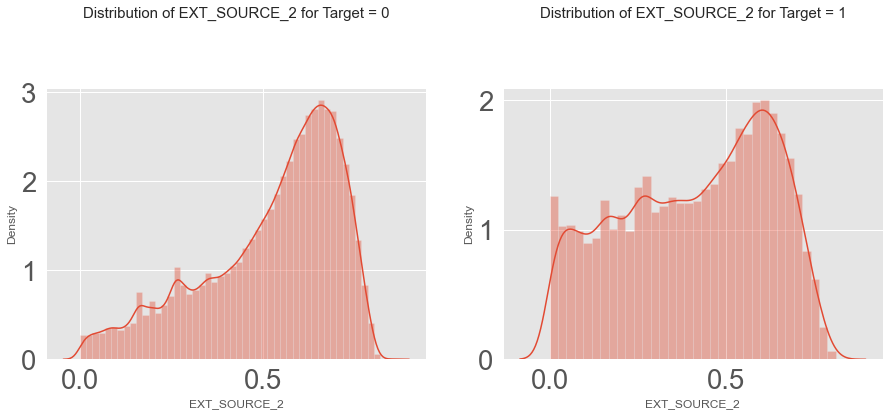

In [333]:
num_univariate('EXT_SOURCE_2')

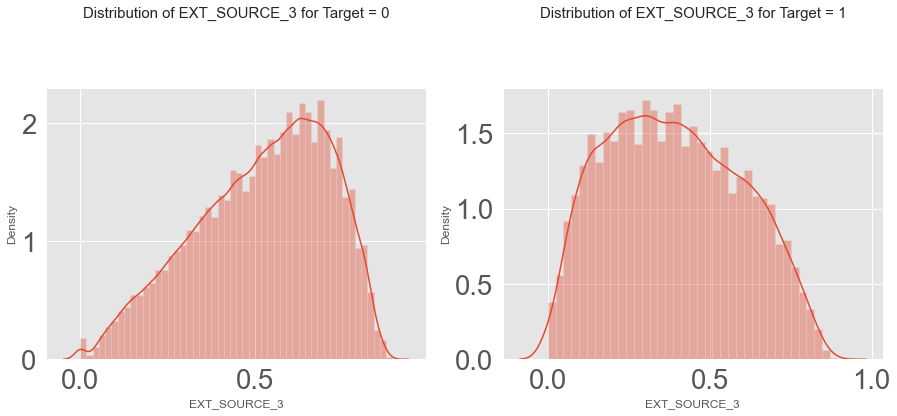

In [334]:
num_univariate('EXT_SOURCE_3')

We can see clients who are facing difficulty in loan repayment have less mode value than other groups. Bank should give more importance to these.

## BIVARIATE ANALYSIS :

In a Bivariate Analysis, we try to analyze two features instead of one, and finally determine the classification of output we are looking for

We have alredy created two dataframes

1. Client without payment difficulties : Target value =0
2. Client with payment difficulties : Target value =1

Now we will analyse Bivariate Analysis on above two mentioned dataframes.

<Figure size 1152x720 with 0 Axes>

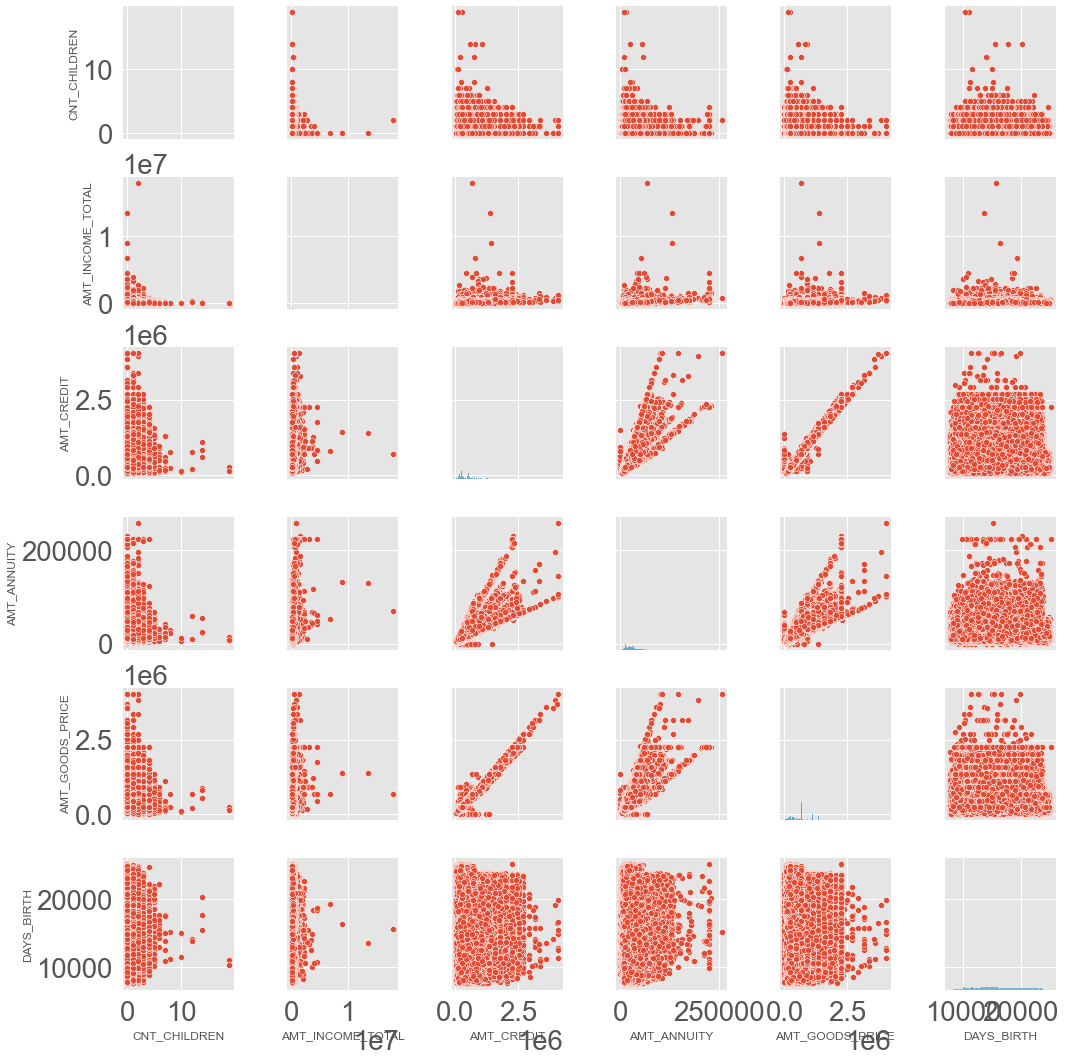

In [194]:
#For Target 0

plt.figure(figsize=[16,10])
plot_pair=application_data_new_first[['CNT_CHILDREN', 'AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','DAYS_BIRTH']].fillna(0)
sns.pairplot(plot_pair)
plt.show()

Linear correlation present between AMT_GOODS_PRICE vs AMT_CREDIT , AMT_GOODS_PRICE vs AMT_ANNUITY

<Figure size 1152x720 with 0 Axes>

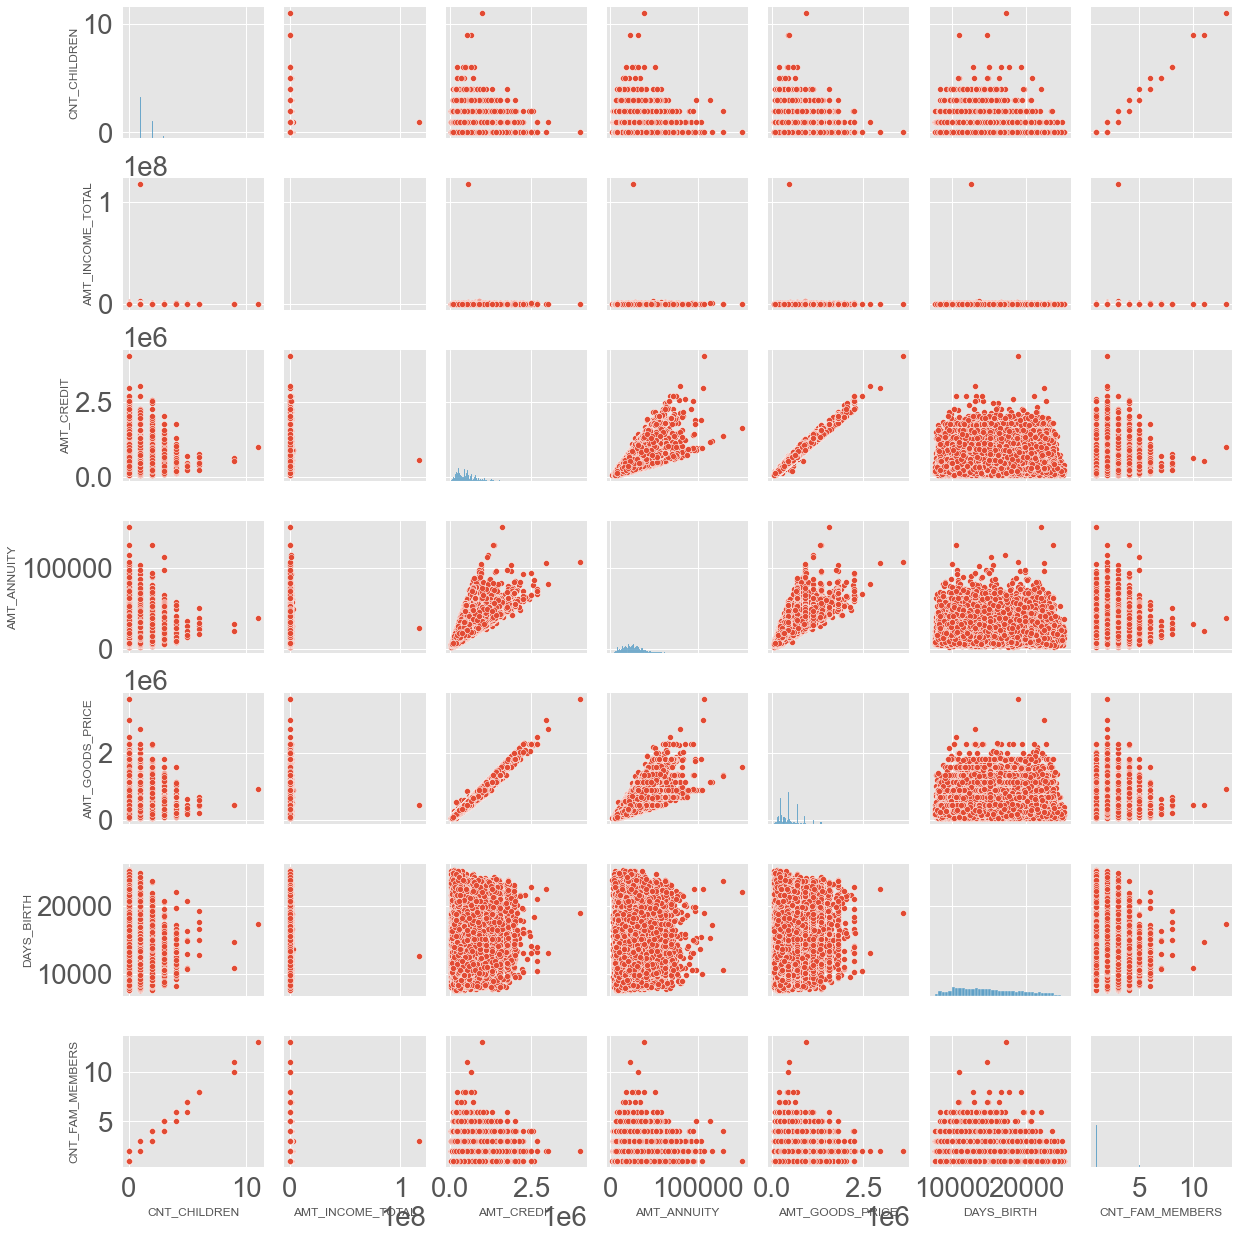

In [198]:
#For Target 1

plt.figure(figsize= [16,10])
columns1= application_data_new_second[['CNT_CHILDREN', 'AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','DAYS_BIRTH',
                         'CNT_FAM_MEMBERS']]

sns.pairplot(columns1, dropna= True)
plt.show()

Observations:

1. weak positive linear relation between AMT_ANNUITY and AMT_GOOD_PRICE.
2. weak positive linear relation between AMT_CREDIT and AMT_ANNUITY.
3. strong positive linear relation between AMT_GOODS_PRICE and AMT_CREDIT.
4. strong positive linear relation between CNT_CHILDREN and CNT_FAM_MEMBER.


## Bivariate Analysis of numerical variables

In [410]:
def bivariate_analysis_graph(col1, col2, fn_sup=14, fn_s=12, xtick_ro= 0, palette= 'Blues'):
    sns.set_style("whitegrid")
    plt.figure(figsize= [18,5])
    title_t= f'{col1} vs {col2}'
    fig = sns.catplot(data= application_data_new, x= col1, y= col2, kind= 'box', col="TARGET", height= 6, aspect= 1.1, palette= palette)
    fig.set_xticklabels(rotation= xtick_ro)
    plt.suptitle(title_t,  fontdict= {'fontsize': fn_sup, 'color': 'Blue'})
    fig.set_ylabels(col2, fontdict= {'fontsize': fn_s, 'color': 'Blue'})
    fig.set_xlabels(col1, fontdict= {'fontsize': fn_s, 'color': 'Blue'})


<Figure size 1296x360 with 0 Axes>

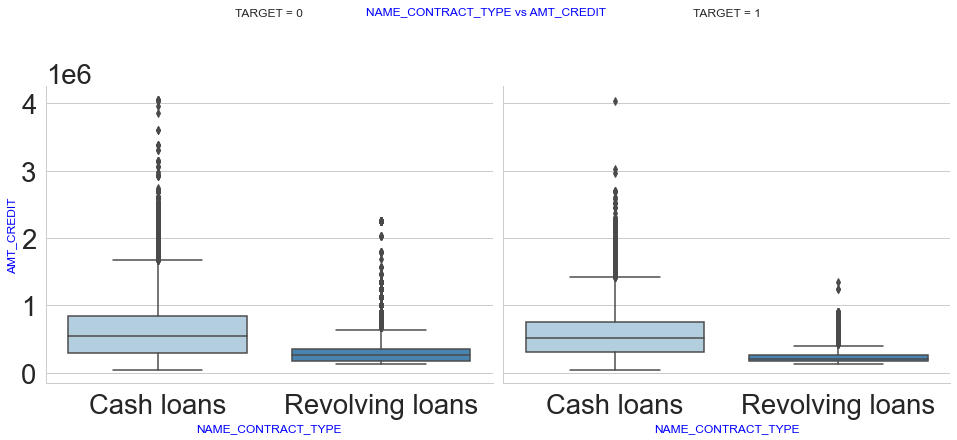

In [411]:
bivariate_analysis_graph(col1 = 'NAME_CONTRACT_TYPE', col2 = 'AMT_CREDIT') 

Observation: We can observe that larger families and people with larger AMT_CREDIT default less often

<Figure size 1296x360 with 0 Axes>

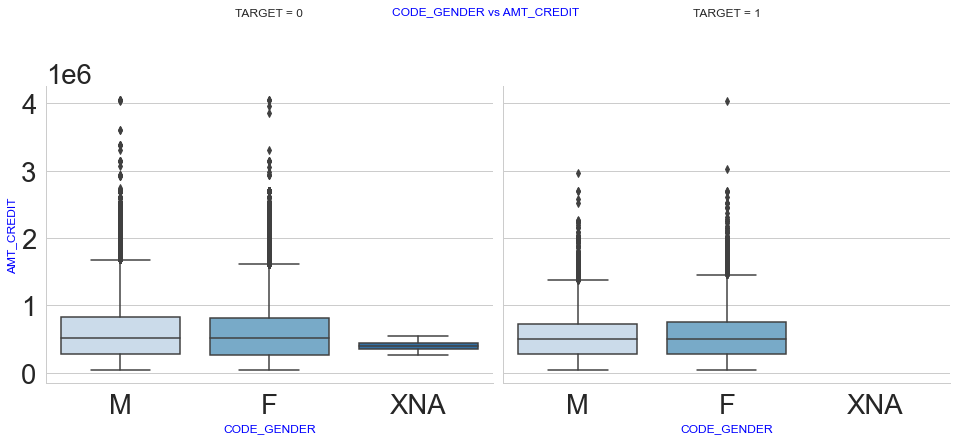

In [412]:
bivariate_analysis_graph('CODE_GENDER', 'AMT_CREDIT')

Observation: There is not much difference in the numbers for both the targets.

<Figure size 1296x360 with 0 Axes>

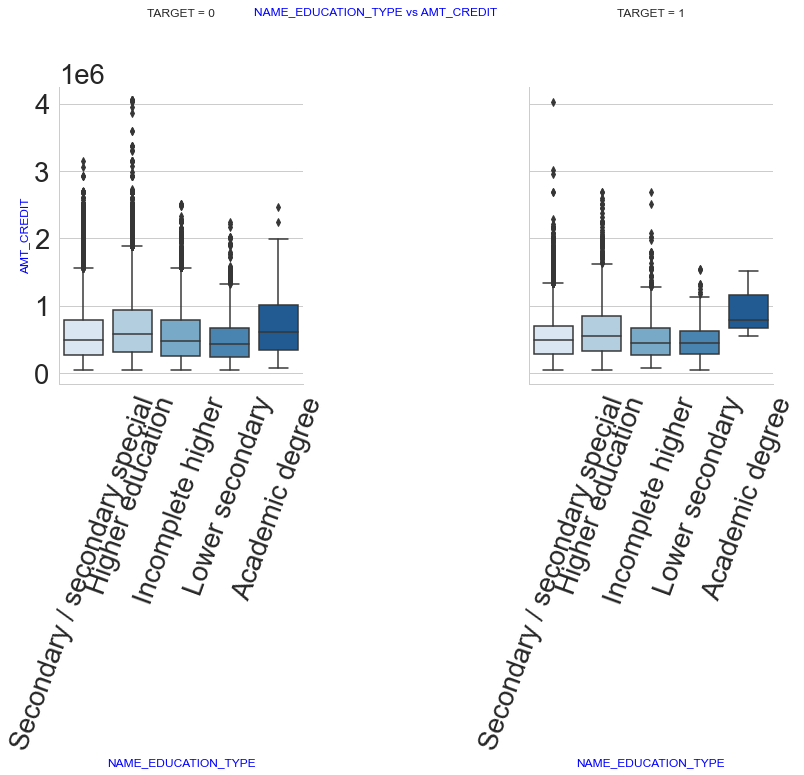

In [422]:
bivariate_analysis_graph('NAME_EDUCATION_TYPE', 'AMT_CREDIT', xtick_ro= 70)

Observation: Median value of Amount credit is higher for clients having 'Academic degree'

<Figure size 1296x360 with 0 Axes>

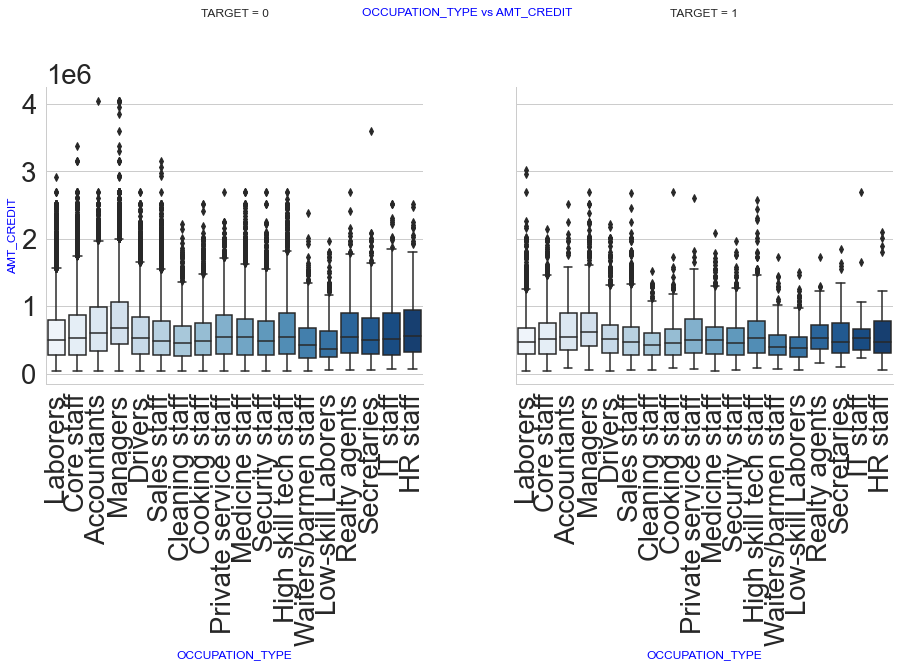

In [419]:
bivariate_analysis_graph(col1= 'OCCUPATION_TYPE',col2= 'AMT_CREDIT', palette= 'Blues', xtick_ro= 90)

Observation: value of Credited amount is the highest for Managers and Lowest for Low-skill Laborers

<Figure size 1296x360 with 0 Axes>

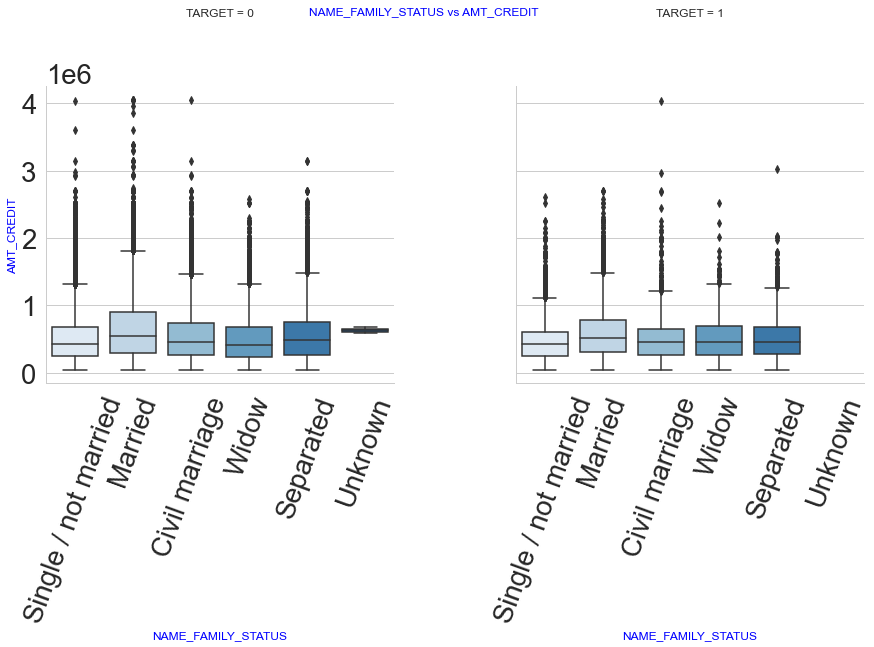

In [421]:
bivariate_analysis_graph(col1= 'NAME_FAMILY_STATUS',col2= 'AMT_CREDIT', xtick_ro= 70)

Observation: Credited amount is the highest for Married customer and lowest for Single customer in both the cases.

## Data Analysis For Previous Application Data

In [205]:
# Importing application data into a dataframe

application_data_previous = pd.read_csv('previous_application.csv')

In [228]:
# Checking variables and structures of the imported dataframe

application_data_previous.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [229]:
# Checking shape of the imported dataframe

application_data_previous.shape

(1670214, 37)

In [230]:
# Checking datatype of the columns imported

application_data_previous.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [232]:
# Checking Mean, Median, Mode of the dataframe and transposing the result to get clear picture

application_data_previous.describe().T

count          mean            std  \
SK_ID_PREV                 1670214.0  1.923089e+06  532597.958696   
SK_ID_CURR                 1670214.0  2.783572e+05  102814.823849   
AMT_ANNUITY                1297979.0  1.595512e+04   14782.137335   
AMT_APPLICATION            1670214.0  1.752339e+05  292779.762387   
AMT_CREDIT                 1670213.0  1.961140e+05  318574.616546   
AMT_DOWN_PAYMENT            774370.0  6.697402e+03   20921.495410   
AMT_GOODS_PRICE            1284699.0  2.278473e+05  315396.557937   
HOUR_APPR_PROCESS_START    1670214.0  1.248418e+01       3.334028   
NFLAG_LAST_APPL_IN_DAY     1670214.0  9.964675e-01       0.059330   
RATE_DOWN_PAYMENT           774370.0  7.963682e-02       0.107823   
RATE_INTEREST_PRIMARY         5951.0  1.883569e-01       0.087671   
RATE_INTEREST_PRIVILEGED      5951.0  7.735025e-01       0.100879   
DAYS_DECISION              1670214.0 -8.806797e+02     779.099667   
SELLERPLACE_AREA           1670214.0  3.139511e+02    7127.443459   
CNT_PAYMENT                1297984.0  1.605408e+01      14.567288   
DAYS_FIRST_DRAWING          997149.0  3.422099e+05   88916.115834   
DAYS_FIRST_DUE              997149.0  1.382627e+04   72444.869708   
DAYS_LAST_DUE_1ST_VERSION   997149.0  3.376777e+04  106857.034789   
DAYS_LAST_DUE               997149.0  7.658240e+04  149647.415123   
DAYS_TERMINATION            997149.0  8.199234e+04  153303.516729   
NFLAG_INSURED_ON_APPROVAL   997149.0  3.325702e-01       0.471134   

                                    min           25%           50%  \
SK_ID_PREV                 1.000001e+06  1.461857e+06  1.923110e+06   
SK_ID_CURR                 1.000010e+05  1.893290e+05  2.787145e+05   
AMT_ANNUITY                0.000000e+00  6.321780e+03  1.125000e+04   
AMT_APPLICATION            0.000000e+00  1.872000e+04  7.104600e+04   
AMT_CREDIT                 0.000000e+00  2.416050e+04  8.054100e+04   
AMT_DOWN_PAYMENT          -9.000000e-01  0.000000e+00  1.638000e+03   
AMT_GOODS_PRICE            0.000000e+00  5.084100e+04  1.123200e+05   
HOUR_APPR_PROCESS_START    0.000000e+00  1.000000e+01  1.200000e+01   
NFLAG_LAST_APPL_IN_DAY     0.000000e+00  1.000000e+00  1.000000e+00   
RATE_DOWN_PAYMENT         -1.497876e-05  0.000000e+00  5.160508e-02   
RATE_INTEREST_PRIMARY      3.478125e-02  1.607163e-01  1.891222e-01   
RATE_INTEREST_PRIVILEGED   3.731501e-01  7.156448e-01  8.350951e-01   
DAYS_DECISION             -2.922000e+03 -1.300000e+03 -5.810000e+02   
SELLERPLACE_AREA          -1.000000e+00 -1.000000e+00  3.000000e+00   
CNT_PAYMENT                0.000000e+00  6.000000e+00  1.200000e+01   
DAYS_FIRST_DRAWING        -2.922000e+03  3.652430e+05  3.652430e+05   
DAYS_FIRST_DUE            -2.892000e+03 -1.628000e+03 -8.310000e+02   
DAYS_LAST_DUE_1ST_VERSION -2.801000e+03 -1.242000e+03 -3.610000e+02   
DAYS_LAST_DUE             -2.889000e+03 -1.314000e+03 -5.370000e+02   
DAYS_TERMINATION          -2.874000e+03 -1.270000e+03 -4.990000e+02   
NFLAG_INSURED_ON_APPROVAL  0.000000e+00  0.000000e+00  0.000000e+00   

                                    75%          max  
SK_ID_PREV                 2.384280e+06  2845382.000  
SK_ID_CURR                 3.675140e+05   456255.000  
AMT_ANNUITY                2.065842e+04   418058.145  
AMT_APPLICATION            1.803600e+05  6905160.000  
AMT_CREDIT                 2.164185e+05  6905160.000  
AMT_DOWN_PAYMENT           7.740000e+03  3060045.000  
AMT_GOODS_PRICE            2.340000e+05  6905160.000  
HOUR_APPR_PROCESS_START    1.500000e+01       23.000  
NFLAG_LAST_APPL_IN_DAY     1.000000e+00        1.000  
RATE_DOWN_PAYMENT          1.089091e-01        1.000  
RATE_INTEREST_PRIMARY      1.933299e-01        1.000  
RATE_INTEREST_PRIVILEGED   8.525370e-01        1.000  
DAYS_DECISION             -2.800000e+02       -1.000  
SELLERPLACE_AREA           8.200000e+01  4000000.000  
CNT_PAYMENT                2.400000e+01       84.000  
DAYS_FIRST_DRAWING         3.652430e+05   365243.000  
DAYS_FIRST_DUE

In [441]:
# Checking missing data

application_data_previous.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [233]:
# Removing all the columns with more than 50% of null values
app_data_previous = application_data_previous.loc[:,application_data_previous.isnull().mean()<=0.5]
app_data_previous.shape

(1670214, 33)

## Checking Outliers

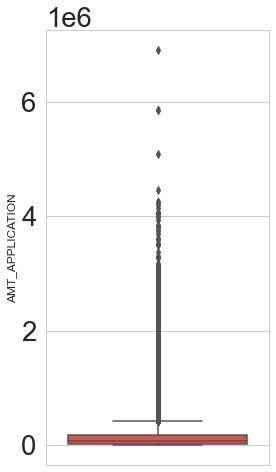

In [442]:
# Plotting box plot of AMT_APPLICATION to check outliers

plt.figure(figsize = (4,8))
sns.boxplot( y=app_data_previous['AMT_APPLICATION'])
plt.show()

Observation: There are many customers having AMT_APPLICATION <0 , so we can drop rows where AMT_APPLICATION value is less than zero

In [445]:
# We will remove these outliers and consider the values AMT_APPLICATION<=2.5M (million)

app_data_previous = app_data_previous[(app_data_previous.AMT_APPLICATION < 2.5*pow(10,6))]
app_data_previous.shape

(1276975, 33)

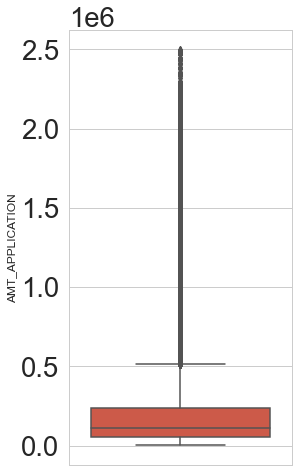

In [450]:
plt.figure(figsize = (4,8))
sns.boxplot( y=app_data_previous['AMT_APPLICATION'])
plt.show()

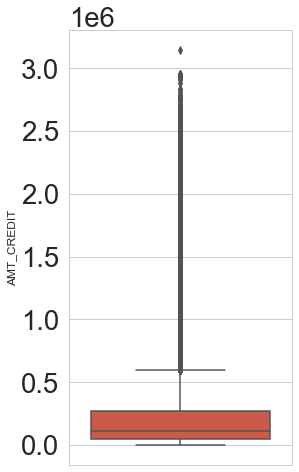

In [449]:
# Plotting box plot of AMT_CREDIT to check outliers

plt.figure(figsize = (4,8))
sns.boxplot( y=app_data_previous['AMT_CREDIT'])
plt.show()

In [452]:
# There are outliers present in the above box plot 

app_data_previous = app_data_previous[(app_data_previous.AMT_CREDIT < 3*pow(10,6))]
app_data_previous.shape

(1276974, 33)

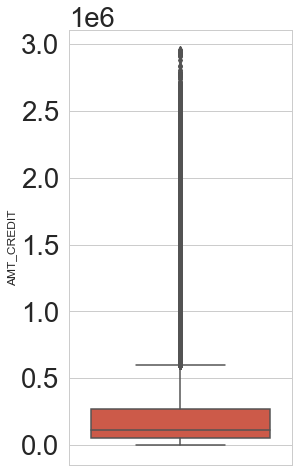

In [453]:
# Plotting box plot of AMT_CREDIT to check outliers

plt.figure(figsize = (4,8))
sns.boxplot( y=app_data_previous['AMT_CREDIT'])
plt.show()

## Univariate analysis of Previous Data

In [454]:
def previous_univariate(col, fn_sup=16, fn_s=14, figsize= [12,8], xtick_ro= 0, palette= 'Reds'):
    prev_column = float(len(app_data_previous))
    sns.set_style("whitegrid")
    fig= plt.figure(figsize= figsize)
    f1_x_label= f'{col}'
    sup_t= f'Count plot for {col}'
    plt.title(sup_t, fontdict= {'fontsize': 19, 'color': 'Blue'})
    plt.xticks(rotation= xtick_ro)
    fig= sns.countplot(data= app_data_previous, x= col, palette= palette)
    fig.set_ylabel('Count', fontdict= {'fontsize': fn_s, 'color': 'Blue'})
    fig.set_xlabel(f1_x_label, fontdict= {'fontsize': fn_s, 'color': 'Blue'})
    for patch in fig.patches:
        percentage = '{:.1f}%'.format(100 * patch.get_height()/prev_column)
        x = patch.get_x() + patch.get_width()
        y = patch.get_height()
        fig.annotate(percentage, (patch.get_x() + patch.get_width() / 2.,
                patch.get_height()), ha = 'center', va = 'center', 
                xytext = (0, 5), textcoords = 'offset points')

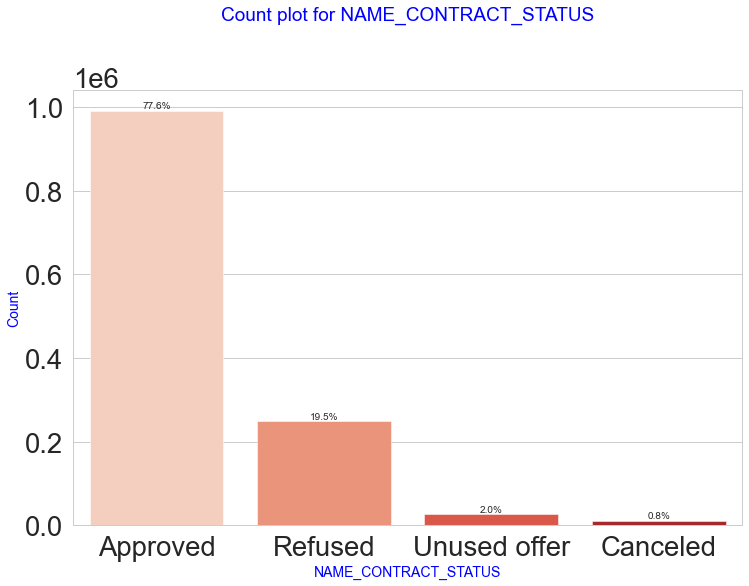

In [456]:
previous_univariate('NAME_CONTRACT_STATUS')

Most of the loan applications are 'Approved'

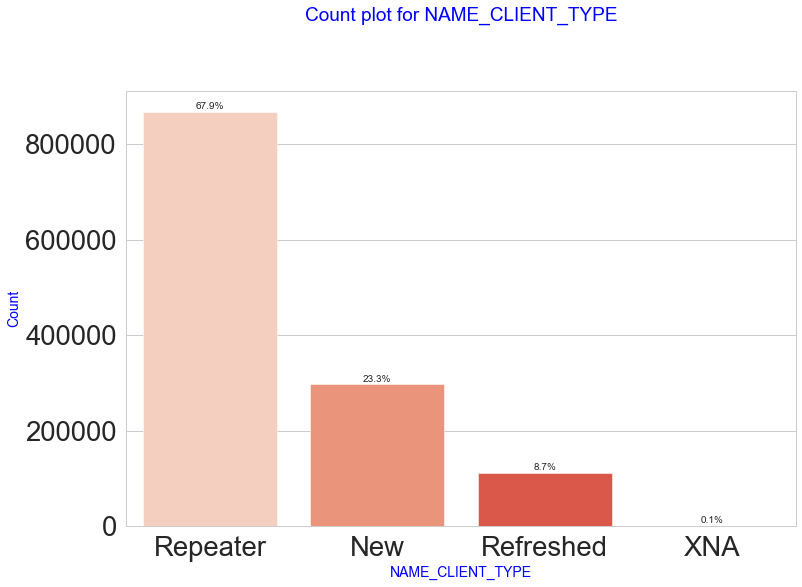

In [457]:
previous_univariate('NAME_CLIENT_TYPE')

Most of the clients in previous applications are Repeater clients.

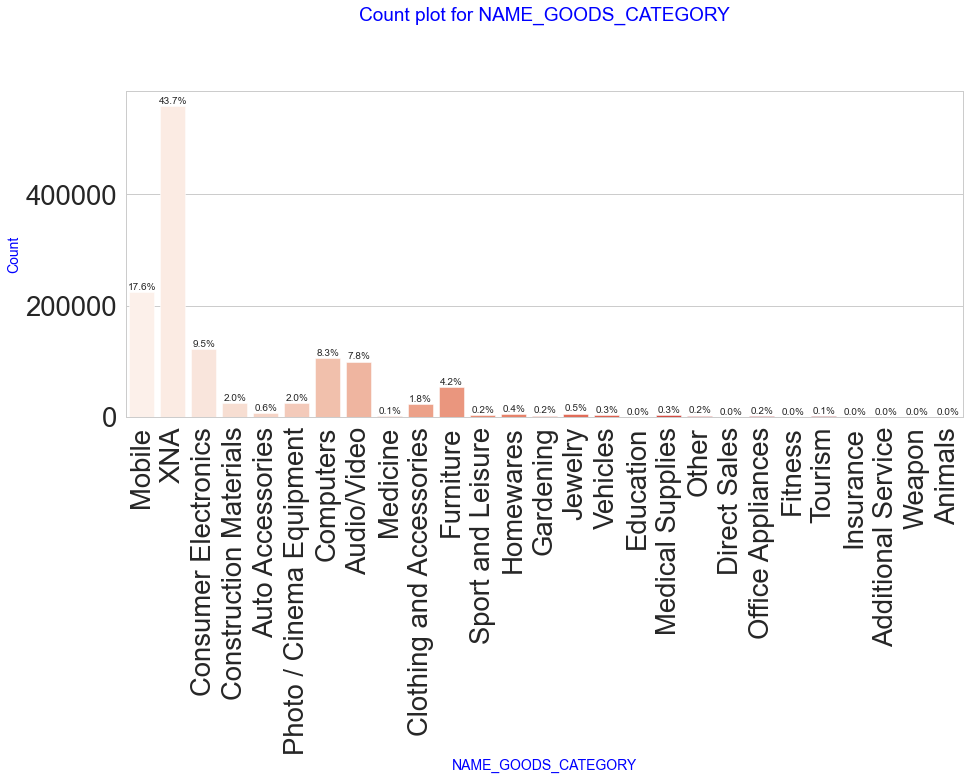

In [458]:
previous_univariate('NAME_GOODS_CATEGORY', figsize= [15,6], xtick_ro= 90)

Most of the Loans are taken for Mobile, Consumer Electronics.

### Checking correlation

In [459]:
#Getting the top 10 correlation PreviousApplication

corr =app_data_previous.corr()
corr_prev = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_prev.columns=['Column1','Column2','Correlation']
corr_prev.dropna(subset=['Correlation'],inplace=True)
corr_prev['Abs_Correlation']=corr_prev['Correlation'].abs()
corr_prev = corr_prev.sort_values(by=['Abs_Correlation'], ascending=False)
corr_prev.head(10)

Column1             Column2  Correlation  \
88             AMT_GOODS_PRICE     AMT_APPLICATION     0.999882   
89             AMT_GOODS_PRICE          AMT_CREDIT     0.993770   
71                  AMT_CREDIT     AMT_APPLICATION     0.993714   
269           DAYS_TERMINATION       DAYS_LAST_DUE     0.969210   
87             AMT_GOODS_PRICE         AMT_ANNUITY     0.820235   
53             AMT_APPLICATION         AMT_ANNUITY     0.820176   
70                  AMT_CREDIT         AMT_ANNUITY     0.813343   
232  DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DRAWING    -0.755719   
174                CNT_PAYMENT          AMT_CREDIT     0.704478   
173                CNT_PAYMENT     AMT_APPLICATION     0.675123   

     Abs_Correlation  
88          0.999882  
89          0.993770  
71          0.993714  
269         0.969210  
87          0.820235  
53          0.820176  
70          0.813343  
232         0.755719  
174         0.704478  
173         0.675123

## Corelation between previous data

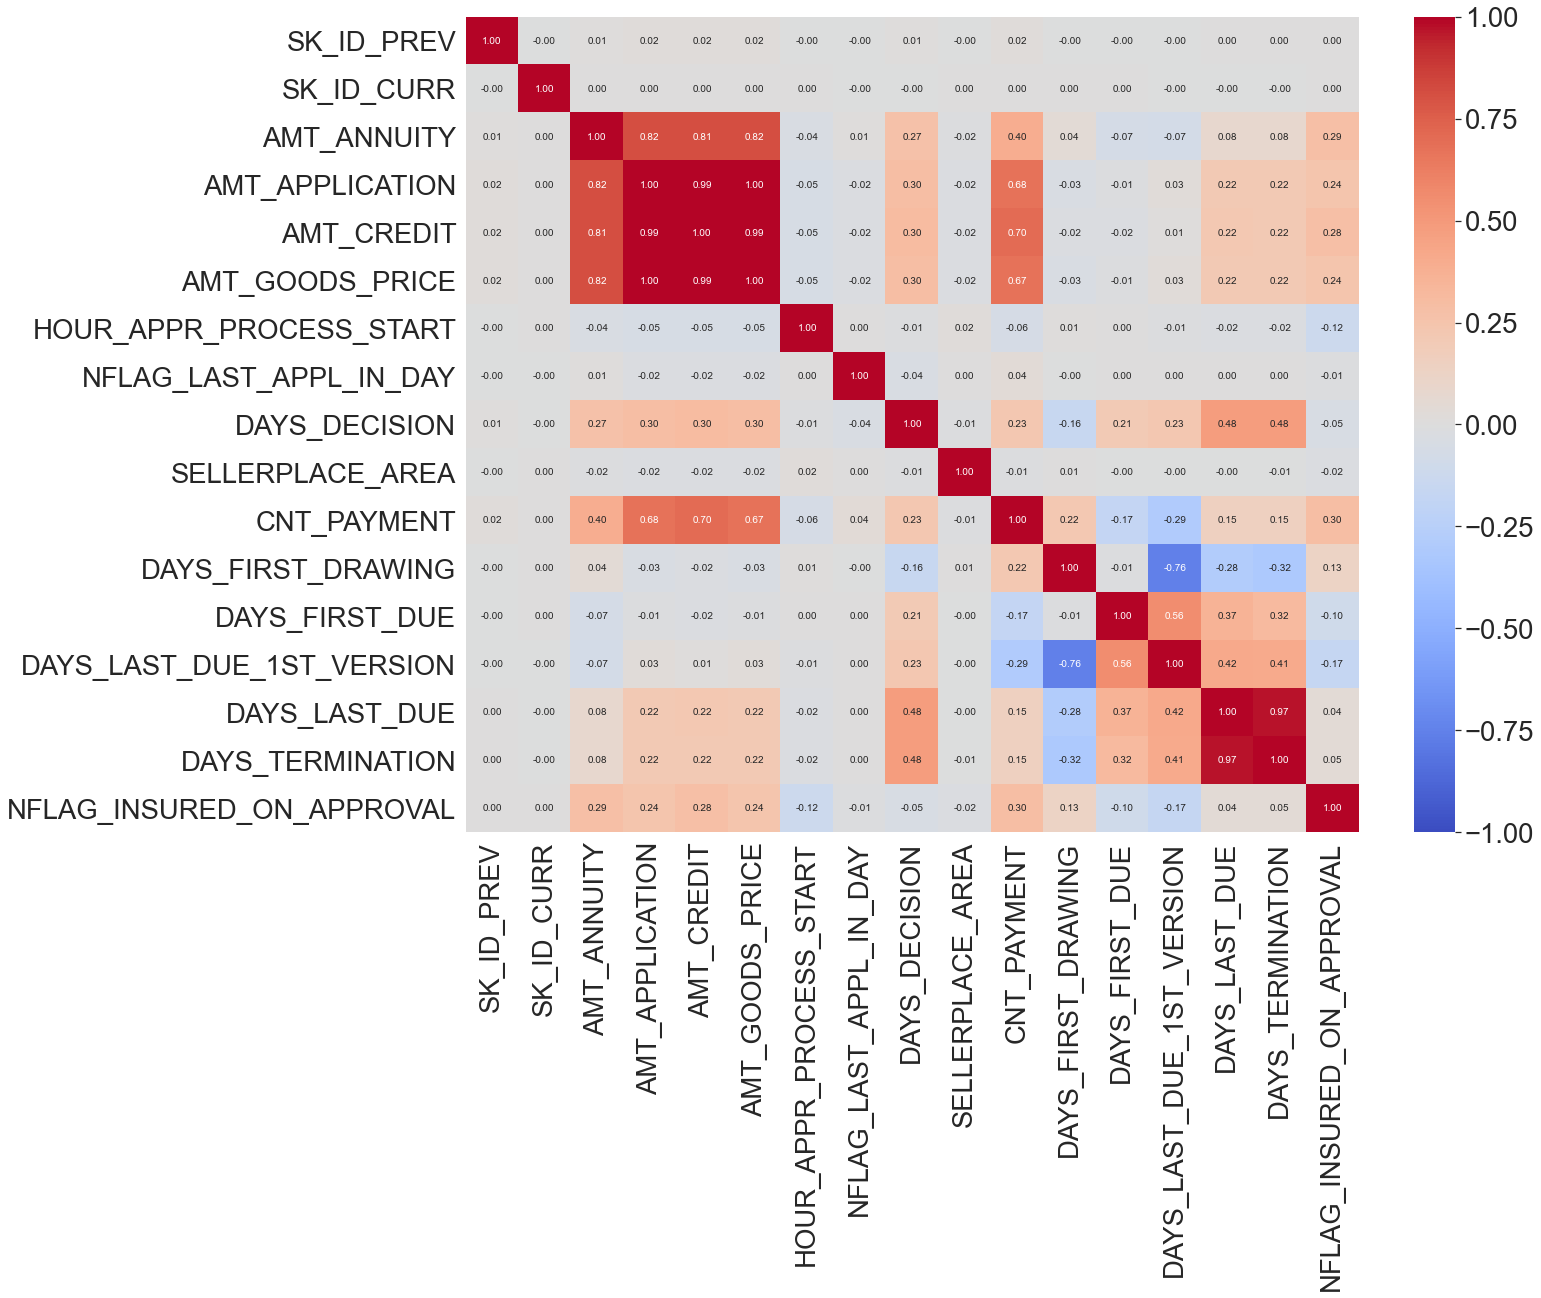

In [460]:
plt.figure(figsize= [20,15])
sns.heatmap(app_data_previous.corr(), annot= True, cmap = 'coolwarm', fmt= '.2f', vmin = -1, vmax = 1)
plt.show()

## Bivariate Analysis of Previous Data

In [475]:
def bivariatepreviousdata(col, rot=0):
    fig= plt.figure(figsize= [14,7])
    plt.xticks(rotation= rot)
    title_t= f'{col} vs NAME_CONTRACT_STATUS'
    fig.suptitle( title_t, fontdict= {'fontsize': 10, 'color': 'Blue'})
    sns.countplot(data= app_data_previous, x= col,  hue='NAME_CONTRACT_STATUS', palette= 'Paired')

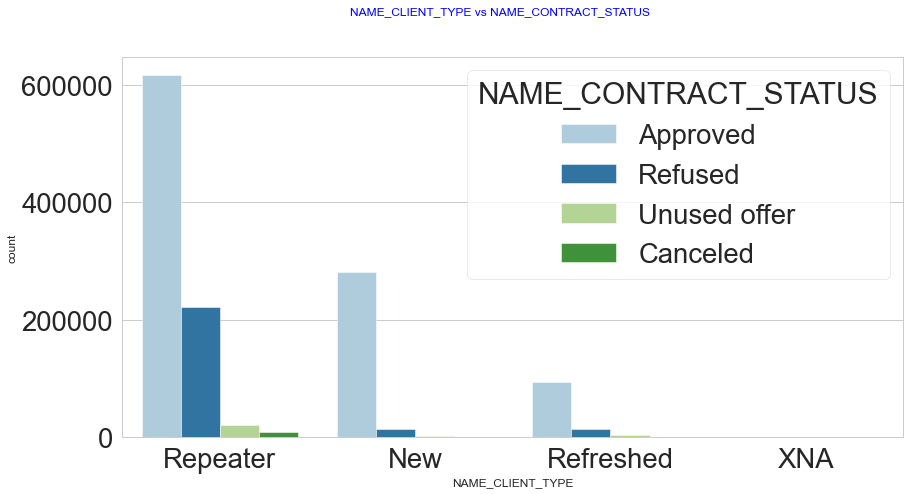

In [476]:
bivariatepreviousdata('NAME_CLIENT_TYPE')

 Observation : Most of the unused offers are from Repeater customers. 

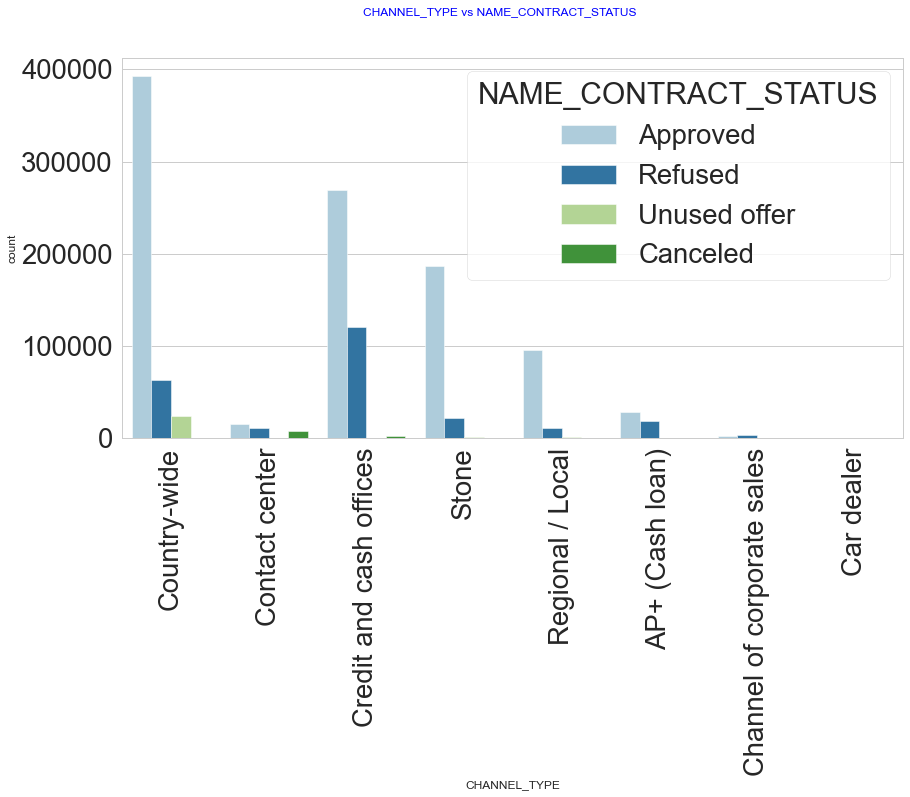

In [477]:
bivariatepreviousdata('CHANNEL_TYPE', rot= 90)

Observation :The loan application most likely will not getting Cancelled if the customer is acquired through 'Country-wide' channel. 

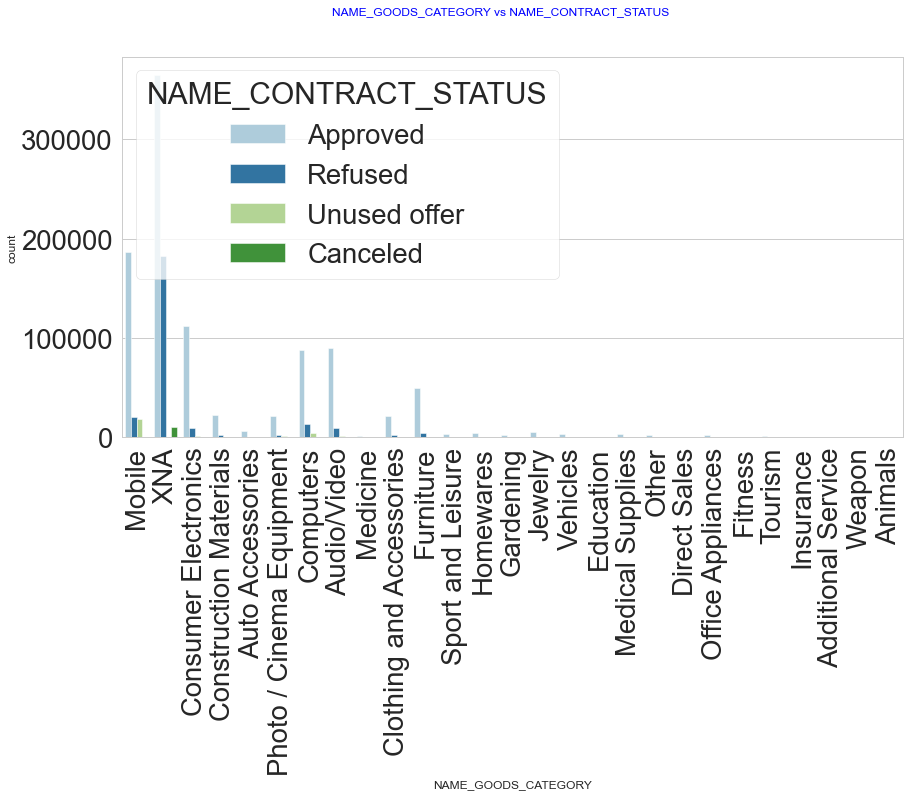

In [478]:
bivariatepreviousdata('NAME_GOODS_CATEGORY', rot= 90)

Observation : Most of loan applications belongs to Mobile goods category.

## Bivariate Analysis of Numeric and Categorical Variables

In [480]:
# Selecting columns having numerical values

column_names_number= ['AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS','CNT_CHILDREN',
                  'HOUR_APPR_PROCESS_START_Previous','HOUR_APPR_PROCESS_START_Current',
                   'AMT_CREDIT_Current','AMT_CREDIT_Previous']
column_names_number

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'CNT_FAM_MEMBERS',
 'CNT_CHILDREN',
 'HOUR_APPR_PROCESS_START_Previous',
 'HOUR_APPR_PROCESS_START_Current',
 'AMT_CREDIT_Current',
 'AMT_CREDIT_Previous']

In [481]:
def bivariatenumbergraph(col1, col2, fn_sup=14, fn_s=7, xtick_ro= 0, palette= 'Blues'):
    sns.set_style("whitegrid")
    plt.figure(figsize= [15,7])
    title_t= f'{col1} vs {col2}'
    fig = sns.catplot(data= app_data_previous, x= col1, y= col2, kind= 'box', col="NAME_CONTRACT_STATUS", col_wrap=2, height= 8, aspect= 1.1, palette= palette)
    fig.set_xticklabels(rotation= xtick_ro)
    plt.suptitle(title_t,  fontdict= {'fontsize': fn_sup, 'color': 'Black'})
    fig.set_ylabels(col2, fontdict= {'fontsize': fn_s, 'color': 'Black'})
    fig.set_xlabels(col1, fontdict= {'fontsize': fn_s, 'color': 'Black'})

<Figure size 1080x504 with 0 Axes>

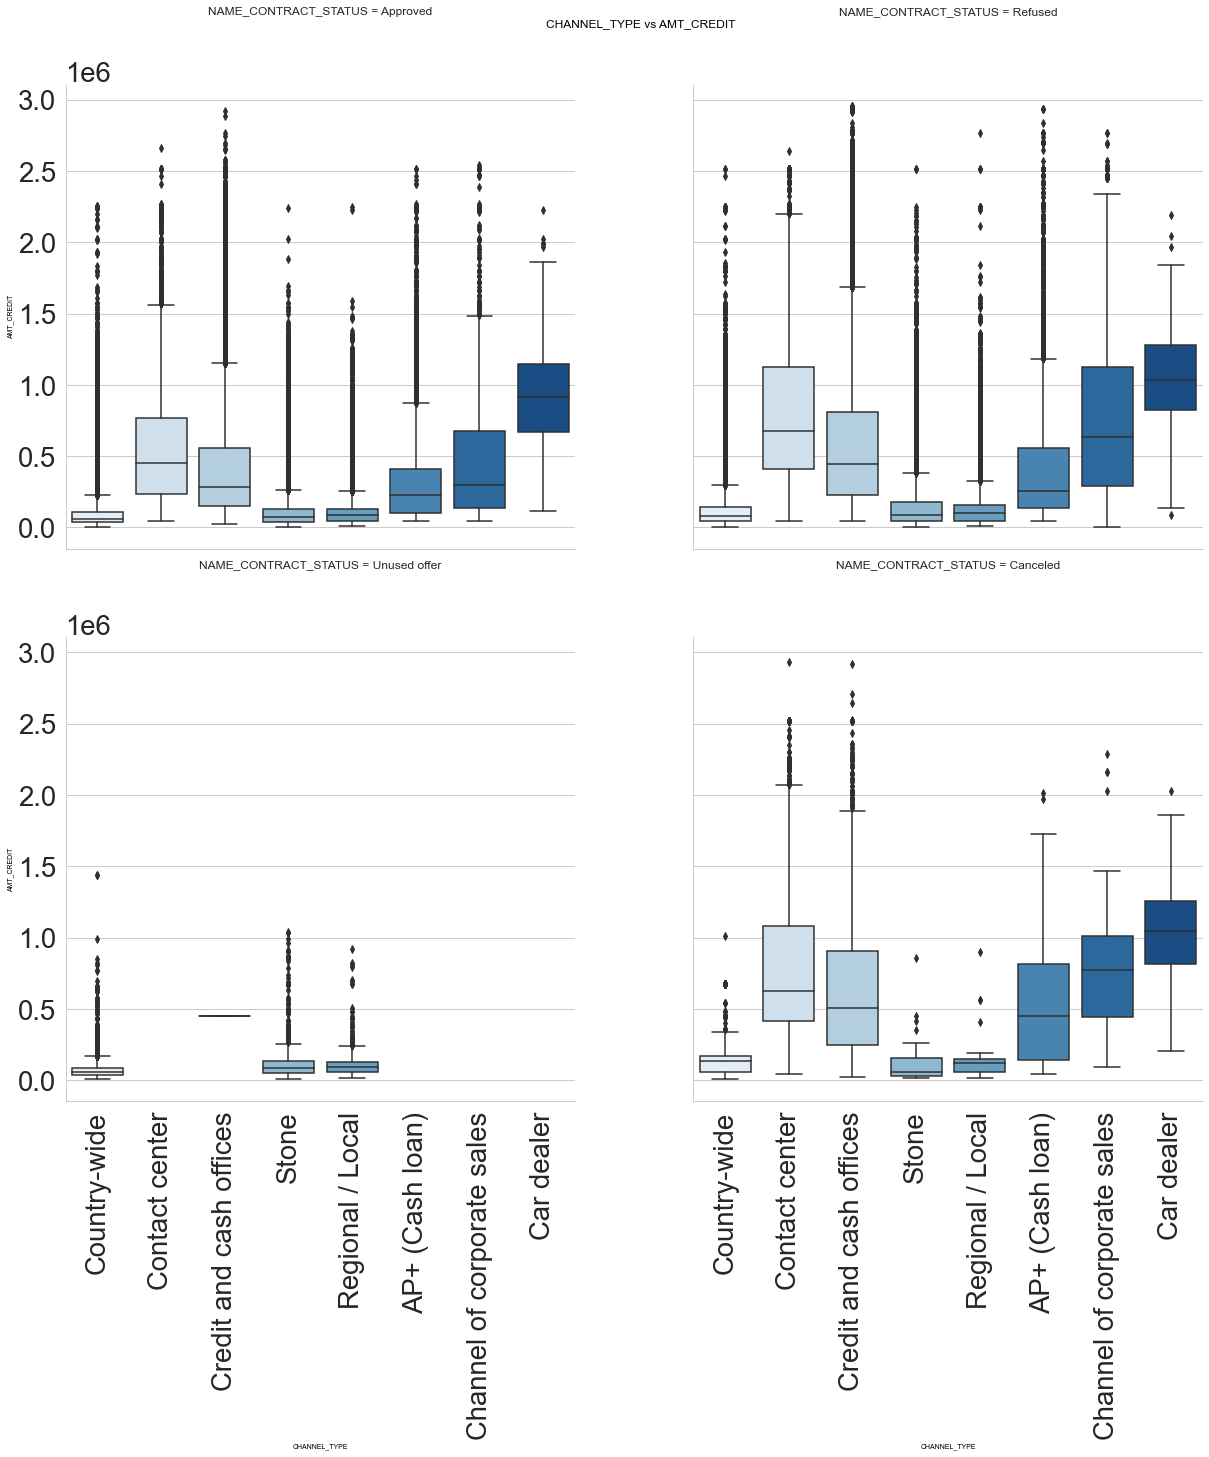

In [482]:
bivariatenumbergraph('CHANNEL_TYPE','AMT_CREDIT', xtick_ro= 90)

<Figure size 1080x504 with 0 Axes>

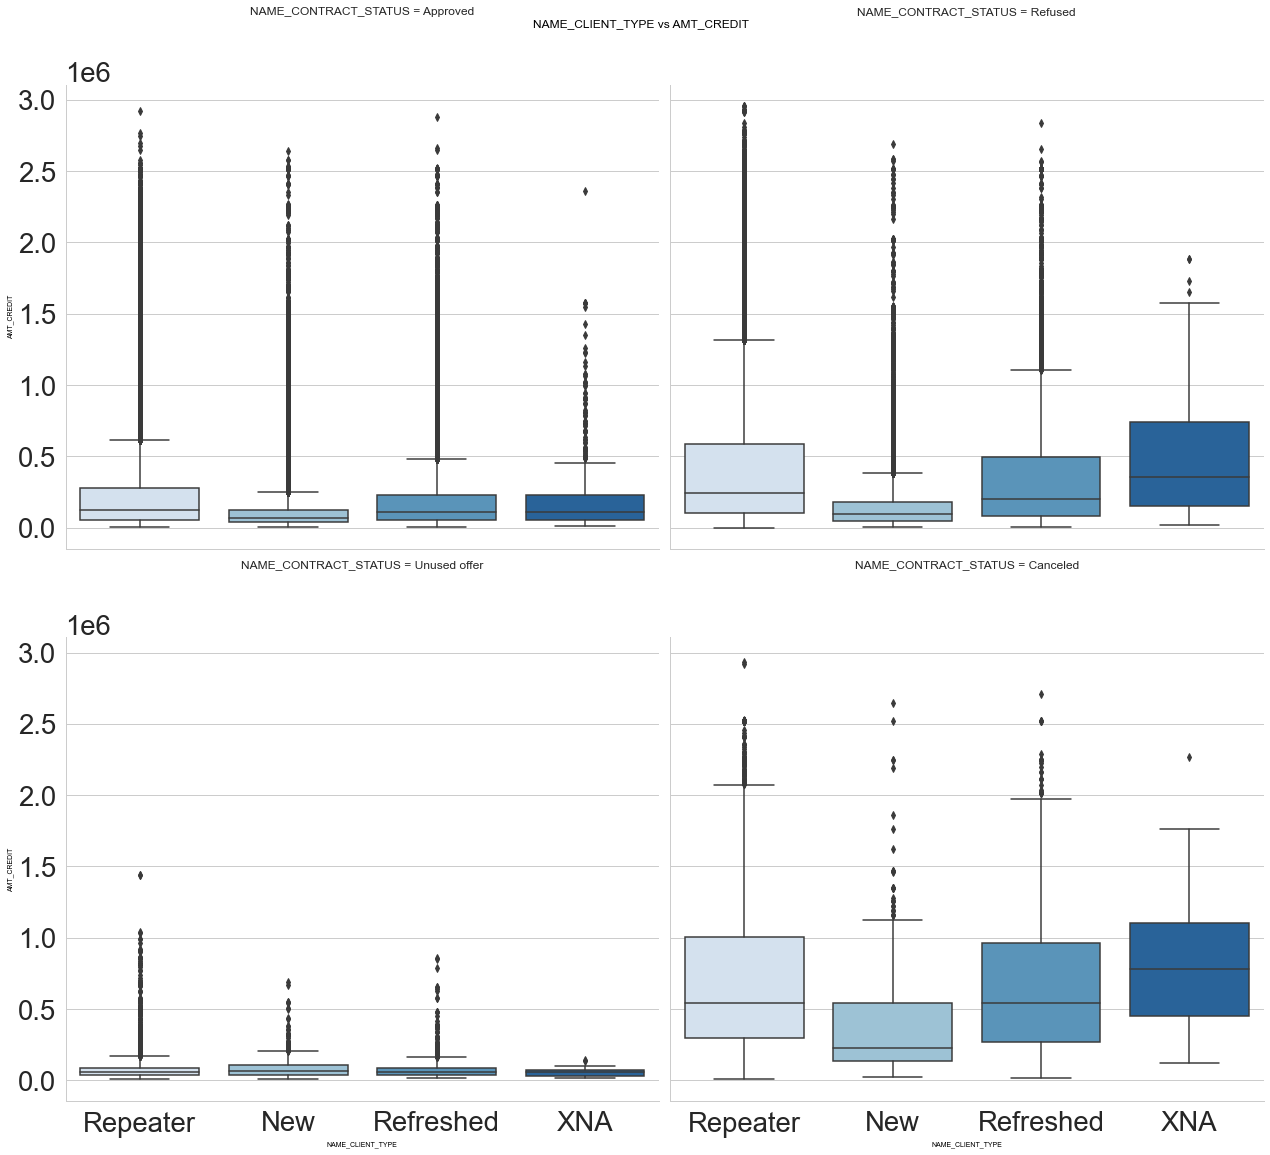

In [483]:
bivariatenumbergraph('NAME_CLIENT_TYPE', 'AMT_CREDIT')

## Conclusions

## Application Data

1. Most of the clients are "Married" and they are less likely to face difficulties in loan repayment. Bank should consider this feature along with other features while approving a loan.
2. Peoples of age group 20-40 of Low ad Higher-Medium income groups and occupation type Laborers are most likely face payment difficulties.
3. Most of the clients are Laborers and they are facing more difficulties in repaying the loan in compare to other high paying jobs.
4. Pensioners are more likely to repay the loan in compare to other income classes.
5. Female clients are much higher than the number of Male clients. Female clients are less likely to face payment difficulties than Male clients. Bank should consider it as a feature to predict loan defaulters.
6. There is a slightly higher chance of clients paying the loan in time if the client owns at least one car. 
7. Clients having "Higher Education" are more likely to repay the loans better than other education groups.


## Previous Application Data

1. Clients acquired by bank through 'Credit and Cash offices' have highest chance of getting refused and Cancelled. 
2. Most of loan applications belongs to Mobile goods category.
3. Most of the loan applications are 'Approved'
4. :The loan application most likely will not getting Cancelled if the customer is acquired through 'Country-wide' channel.
5. Most of the clients in previous applications are Repeater clients.
6. Most of the unused offers are from Repeater customers.
